# 📊 Cervical Cancer Screening Uptake Among Female Tertiary Students in Ghana

**Welcome to this interactive notebook analyzing cervical cancer screening uptake among female tertiary students in the Hohoe Municipality, Ghana.**  
Our goal is to explore factors influencing awareness, knowledge, and uptake of cervical cancer screening services, using insightful visualizations and statistical summaries.

In this notebook, you’ll find:

📌 Clean and well-documented Exploratory Data Analysis (EDA)  
📊 Visualizations on knowledge levels, awareness factors, and screening uptake behaviors  
💡 Insights to support public health interventions and targeted health education campaigns  
📈 Advanced visual plots such as Sankey diagrams, diverging bar charts, Likert-style graphs, and more

Whether you're a researcher, data analyst, or healthcare advocate — there’s valuable insight here for you.

🔄 Check back often! This notebook may be updated with improved plots and advanced modeling.

---

## 📌 DATA SOURCE INSTRUCTIONS

This notebook intelligently detects whether it’s being run on **Kaggle** or **locally (e.g., VSCode, Jupyter, Colab)** and loads the dataset accordingly.

---

### ⚠️ IMPORTANT INSTRUCTIONS for Kaggle Users:

If you're using this notebook on **Kaggle**, please make sure to:

1. Click the **"Add data"** button on the right sidebar  
2. In the search bar, type:  
   `cervical cancer survey Ghana female students`  
3. Select and add the dataset titled:  
   **`cervical-cancer-survey-ghana-female-students`** by **Promise Bansah**

> 📁 The notebook is designed to automatically load the dataset if added. Otherwise, it will raise a "File not found" error on Kaggle.

---

### ✅ Local Setup (VSCode, Jupyter Notebook, or Colab)

If you're running this notebook **locally**, the dataset will be downloaded automatically using [`kagglehub`](https://pypi.org/project/kagglehub/). Ensure the following:

- ✅ You have Python installed  
- ✅ You have installed the `kagglehub` library using:

  ```bash
  pip install kagglehub 

🛠 The command pip install kagglehub will be executed automatically in the next cell of the notebook.
However, if it fails (especially in Jupyter environments), kindly install it manually from your Bash, Terminal, or Command Prompt.

## Import Dataset

In [ ]:
import os
import sys
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import textwrap

# ✅ Check environment: Kaggle or Local
is_kaggle = "KAGGLE_KERNEL_RUN_TYPE" in os.environ
print("📍 Running on Kaggle" if is_kaggle else "📍 Running Locally (VSCode, Jupyter, etc.)")

# 🔄 Install kagglehub if not on Kaggle
if not is_kaggle:
    try:
        import kagglehub
    except ImportError:
        print("🔄 Installing kagglehub...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "kagglehub"])
        import kagglehub
else:
    import kagglehub  # Safe import even if not used on Kaggle

# 📦 Dataset configuration
dataset_name = "promisebansah/cervical-cancer-survey-ghana-female-students"
dataset_dir = None
data_path = None

# 📁 Locate dataset directory
if is_kaggle:
    dataset_dir = "/kaggle/input/cervical-cancer-survey-ghana-female-students"
else:
    try:
        dataset_dir = kagglehub.dataset_download(dataset_name)
    except Exception as e:
        print("❌ Error downloading dataset via kagglehub:", e)
        dataset_dir = None

# 🔍 Locate CSV file inside dataset
if dataset_dir and os.path.exists(dataset_dir):
    for root, _, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(".csv"):
                data_path = os.path.join(root, file)
                print("📦 Found CSV file:", data_path)
                break
else:
    print("❌ Dataset directory not found")

# 📊 Load the dataset
if data_path:
    try:
        df = pd.read_csv(data_path)
        print("✅ Dataset loaded successfully!")
        display(df.head())
    except Exception as e:
        print("❌ Failed to load dataset:", e)
else:
    print("❌ No CSV file detected")


📍 Running Locally (VSCode, Jupyter, etc.)
📦 Found CSV file: C:\Users\Jupyter\.cache\kagglehub\datasets\promisebansah\cervical-cancer-survey-ghana-female-students\versions\2\cervical cancer.csv
✅ Dataset loaded successfully!


,age,marital,lev,reli,affiliation,Uptake,agegrp,permis_to_scrn,giv_oportu_to_scrn,aware_of_scrn_centa,...,screen_from_age_21,screen_every_2_years,visual_is_one_method,visual_only_method,visual_is_easiest_method,screening_for_healthy,screening_for_early_detection,detection_can_prevent_cancer,regular_screening_helps_detection,visual_at_any_level
0,24,single,300,christian,MIDWIERY,no,20-25years,no,no,no,...,SA,A,D,D,A,A,A,SA,A,SA
1,19,single,100,christian,FRANCO,no,<20years,no,no,no,...,A,A,A,A,A,A,SD,D,D,D
2,19,single,100,christian,TERESCO,no,<20years,yes,yes,no,...,A,D,A,SD,SA,D,D,D,A,D
3,23,single,400,christian,UHAS,no,20-25years,no,yes,no,...,SA,SA,A,SD,A,SD,SA,D,SA,D
4,25,single,400,christian,UHAS,no,20-25years,yes,yes,no,...,A,A,D,D,SD,A,A,A,A,SD


In [82]:
ccan = pd.read_csv("J:\FOLDER\RESEACRCH\Manuscript\In Progress\Cervicsl cancer\Analysis\Dataset and dictionary\cer_can.csv")

<>:1: SyntaxWarning:

invalid escape sequence '\F'

<>:1: SyntaxWarning:

invalid escape sequence '\F'

C:\Users\Jupyter\AppData\Local\Temp\ipykernel_29744\2771653293.py:1: SyntaxWarning:

invalid escape sequence '\F'



In [83]:
display(ccan)

,age,marital,lev,reli,affiliation,Uptake,agegrp,permis_to_scrn,giv_oportu_to_scrn,aware_of_scrn_centa,...,screen_from_age_21,screen_every_2_years,visual_is_one_method,visual_only_method,visual_is_easiest_method,screening_for_healthy,screening_for_early_detection,detection_can_prevent_cancer,regular_screening_helps_detection,visual_at_any_level
0,24,single,300,christian,MIDWIERY,no,20-25years,no,no,no,...,SA,A,D,D,A,A,A,SA,A,SA
1,19,single,100,christian,FRANCO,no,<20years,no,no,no,...,A,A,A,A,A,A,SD,D,D,D
2,19,single,100,christian,TERESCO,no,<20years,yes,yes,no,...,A,D,A,SD,SA,D,D,D,A,D
3,23,single,400,christian,UHAS,no,20-25years,no,yes,no,...,SA,SA,A,SD,A,SD,SA,D,SA,D
4,25,single,400,christian,UHAS,no,20-25years,yes,yes,no,...,A,A,D,D,SD,A,A,A,A,SD
5,21,single,200,christian,FRANCO,yes,20-25years,no,yes,no,...,D,D,SD,D,SD,SD,D,A,SA,D
6,23,single,300,christian,UHAS,no,20-25years,no,yes,yes,...,A,SA,SA,D,SA,D,SA,SA,SA,D
7,25,single,400,christian,FRANCO,no,20-25years,no,no,yes,...,SD,D,SD,SD,D,SD,D,D,SD,SD
8,23,single,200,christian,FRANCO,no,20-25years,yes,yes,yes,...,A,A,SD,SD,D,SD,SD,SD,A,SD
9,21,single,100,christian,FRANCO,no,20-25years,no,no,yes,...,A,A,D,D,A,SA,SA,SA,SA,SA


In [84]:
# Display the shape of the data structure
ccan.shape

(354, 48)

# **1.0 Demographic Characteristics**

| **Variable Name** | **Meaning** |
|-------------------|-------------|
| `agegrp`          | Age group of the participant |
| `marital`         | Marital status of the participant |
| `lev`             | Highest level of education attained |
| `reli`            | Religious affiliation |
| `affiliation`     | School affiliation |


In [85]:
# Display the first 5 rows of the data
demo = ccan[['agegrp', 'marital', 'lev', 'reli', 'affiliation',]]
# Display the  demographic data  
display(demo)

,agegrp,marital,lev,reli,affiliation
0,20-25years,single,300,christian,MIDWIERY
1,<20years,single,100,christian,FRANCO
2,<20years,single,100,christian,TERESCO
3,20-25years,single,400,christian,UHAS
4,20-25years,single,400,christian,UHAS
5,20-25years,single,200,christian,FRANCO
6,20-25years,single,300,christian,UHAS
7,20-25years,single,400,christian,FRANCO
8,20-25years,single,200,christian,FRANCO
9,20-25years,single,100,christian,FRANCO


In [86]:
#Descriptive statistics for age
ccan['age'].describe()

count   354.000
mean     22.630
std       2.056
min      17.000
25%      21.000
50%      22.000
75%      24.000
max      32.000
Name: age, dtype: float64

## **1.1 Demographic Characteristic vs Cervical Cancer Screening Uptake**

---

This section examines the relationship between key demographic characteristics and cervical cancer screening uptake among female tertiary students. Crosstabulations were performed to compare screening uptake rates across age groups, marital status, level of study, religion, and institutional affiliation.

___

## **1.2 Uptake(ever screened for cervical cancer)**

___

The summary statistics indicate that only 14% of female tertiary students reported ever being screened for cervical cancer, while a substantial 86% have never undergone screening. This low uptake highlights a significant gap in preventive health behavior within this population.
___

In [87]:
# summary statistics for uptake(ever screened for cervical cancer)
prop = ccan['Uptake'].value_counts()
perc = ccan['Uptake'].value_counts(normalize=True).round(2) * 100
# Display the counts and percentages of 'ever_screen'
ever_scrn = pd.DataFrame({'Counts': prop, 'Percentage': perc})
ever_scrn

,Counts,Percentage
Uptake,,
no,306,86.000
yes,48,14.000


## **1.3 Uptake vs Demographic Characteristics**

___
The cross-tabulation of cervical cancer screening uptake by age group shows that screening rates remain low across all groups, with only 12.1% of students aged 20–25 years, 25.0% of those under 20 years, and 22.2% of those over 25 years reporting ever being screened. The majority in each age group have never undergone screening.
___

The cross-tabulation by marital status shows that cervical cancer screening uptake is low among both married and single female tertiary students. Only 20.0% of married students and 13.5% of single students reported ever being screened. The majority in both groups have never undergone screening.
___

Screening uptake by level of study shows that the proportion of students ever screened for cervical cancer is low across all academic levels, ranging from 8.9% to 18.0%. The highest uptake was observed among 200-level students (18.0%), while the lowest was among 400-level students (8.9%). This suggests no consistent increase in uptake with academic progression.
___

For religious affiliation, uptake was also low in both groups, with 13.3% of Christian and 28.6% of Muslim students reporting ever being screened. The majority in both religious groups have never undergone screening.
___

Screening uptake by institutional affiliation was generally low, with the highest uptake observed among UHAS students (**17.6%**) and the lowest among FRANCO students (**8.1%**). Uptake among MIDWIFERY and TERESCO students was **15.6%** and **11.8%**, respectively. Despite some variation, the majority of students in all affiliations had never been screened for cervical cancer.
___

In [88]:
# Display the frequency and percentages of 'ever_screen' with totals
for col in demo.columns:
    print(f'Frequency (Percentages) for {col} vs Uptake')
    ct = pd.crosstab(demo[col], ccan['Uptake'])  # Crosstab counts
    ct_perc = pd.crosstab(demo[col], ccan['Uptake'], normalize='index') * 100  # Row percentages
    combined = ct.astype(str) + ' (' + ct_perc.round(1).astype(str) + '%)'  # Combine counts & percentages
    combined['Total'] = ct.sum(axis=1).astype(str) + ' (100.0%)'   #Add totals
    display(combined) 

Frequency (Percentages) for agegrp vs Uptake


Uptake,no,yes,Total
agegrp,,,
20-25years,270 (87.9%),37 (12.1%),307 (100.0%)
<20years,15 (75.0%),5 (25.0%),20 (100.0%)
>25years,21 (77.8%),6 (22.2%),27 (100.0%)


Frequency (Percentages) for marital vs Uptake


Uptake,no,yes,Total
marital,,,
married,4 (80.0%),1 (20.0%),5 (100.0%)
single,302 (86.5%),47 (13.5%),349 (100.0%)


Frequency (Percentages) for lev vs Uptake


Uptake,no,yes,Total
lev,,,
100,79 (84.0%),15 (16.0%),94 (100.0%)
200,82 (82.0%),18 (18.0%),100 (100.0%)
300,72 (91.1%),7 (8.9%),79 (100.0%)
400,73 (90.1%),8 (9.9%),81 (100.0%)


Frequency (Percentages) for reli vs Uptake


Uptake,no,yes,Total
reli,,,
christian,301 (86.7%),46 (13.3%),347 (100.0%)
muslim,5 (71.4%),2 (28.6%),7 (100.0%)


Frequency (Percentages) for affiliation vs Uptake


Uptake,no,yes,Total
affiliation,,,
FRANCO,79 (91.9%),7 (8.1%),86 (100.0%)
MIDWIERY,76 (84.4%),14 (15.6%),90 (100.0%)
TERESCO,67 (88.2%),9 (11.8%),76 (100.0%)
UHAS,84 (82.4%),18 (17.6%),102 (100.0%)


# **2.0 Objective 1: Assess Awareness of Cervical Cancer Screening**



---

Awareness of cervical cancer screening is a critical determinant of screening uptake and early detection. In this study, we evaluated two key indicators of awareness among female tertiary students: (1) whether participants had ever been told to undergo cervical cancer screening, and (2) whether they were aware of any screening centre. 

---

## **2.1 Ever Told to Screen and Awareness of Screening Centre**



| **Variable Name**  | **Meaning**                                                                               |
| -------------------------------------------------- | ----------------------------------------------------------------------------------------- |
| `eva_told_to_scm `                                 |Ever been told to go for screening
| `aware of any screening centre`                    | Doest the participant know of any screening centre          |



---

To assess specific aspects of awareness, we examined two key variables: whether respondents had ever been told to undergo cervical cancer screening, and whether they were aware of any screening centre. The results showed that only **40%** of participants reported ever being told to screen, while **35%** were aware of a screening centre.

---

In [89]:
# Display the awareness of cervical cancer screening
awareness = ccan[['eva_told_to_scrn', 'aware_of_scrn_centa']].copy()
awareness

,eva_told_to_scrn,aware_of_scrn_centa
0,no,no
1,no,no
2,no,no
3,yes,no
4,no,no
5,no,no
6,yes,yes
7,no,yes
8,no,yes
9,no,yes


In [90]:
# displays the frequency and percentage of respondents
awareness_counts = awareness.apply(lambda x: x.value_counts()) # Count occurrences of each response
awareness_perc = awareness.apply(lambda x: x.value_counts(normalize=True).round(2) * 100) # Calculate percentages of each response

# Combine counts and percentages 
awareness_summary = pd.DataFrame({
    'Ever Told to Screen (Count)': awareness_counts['eva_told_to_scrn'],
    'Ever Told to Screen (%)': awareness_perc['eva_told_to_scrn'],
    'Aware of Screening Centre (Count)': awareness_counts['aware_of_scrn_centa'],
    'Aware of Screening Centre (%)': awareness_perc['aware_of_scrn_centa']
})

awareness_summary

,Ever Told to Screen (Count),Ever Told to Screen (%),Aware of Screening Centre (Count),Aware of Screening Centre (%)
no,213,60.000,231,65.000
yes,141,40.000,123,35.000



---

### **2.1.1 Screening Awareness Plot**
---

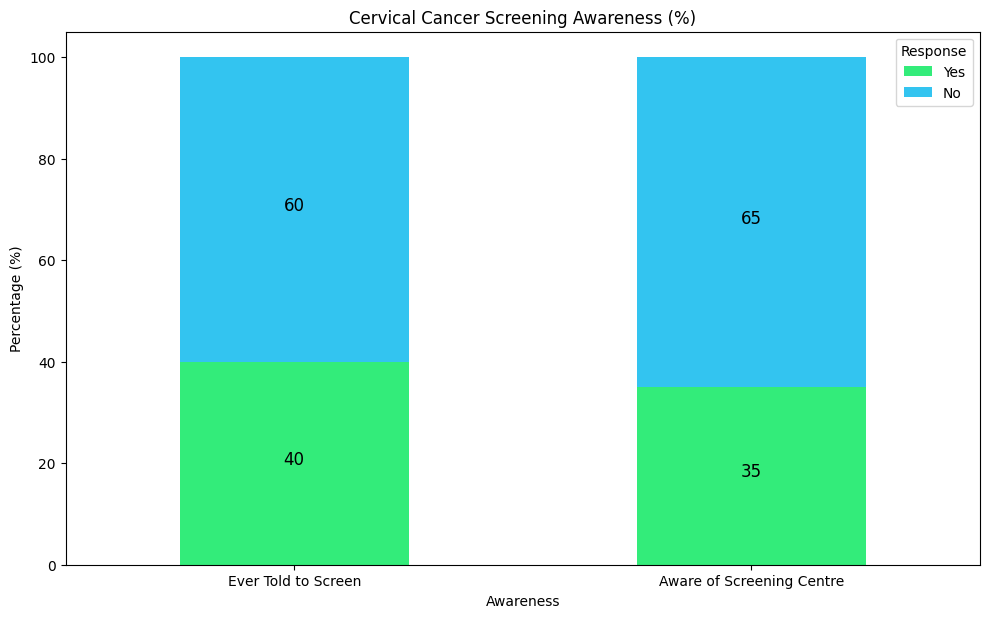

In [91]:
# Calculate awareness_summary 
awareness_counts = awareness.apply(lambda x: x.value_counts())
awareness_perc = awareness.apply(lambda x: x.value_counts(normalize=True).round(2) * 100)
awareness_summary = pd.DataFrame({
    'Ever Told to Screen (Count)': awareness_counts['eva_told_to_scrn'],
    'Ever Told to Screen (%)': awareness_perc['eva_told_to_scrn'],
    'Aware of Screening Centre (Count)': awareness_counts['aware_of_scrn_centa'],
    'Aware of Screening Centre (%)': awareness_perc['aware_of_scrn_centa']
})

# Prepare data for plotting using awareness_summary generated above
plot_df = pd.DataFrame({
    'Ever Told to Screen': awareness_summary['Ever Told to Screen (%)'],
    'Aware of Screening Centre': awareness_summary['Aware of Screening Centre (%)']
}, index=['no', 'yes']).T

# Reord columns to ['yes', 'no'] for stacking (Yes first, then No)
plot_df = plot_df[['yes', 'no']]

# Plot the stacked bar chart
plot_df.plot(
    kind='bar',
    stacked=True,
    color=["#33ec7a", "#33c4f0"],
    figsize=(10, 8)
)

plt.title('Cervical Cancer Screening Awareness (%)')
plt.ylabel('Percentage (%)')
plt.xlabel('Awareness')
plt.legend(['Yes', 'No'], title='Response')
plt.tight_layout()
plt.xticks(rotation=0)

# Add value labels to each bar 
for container in plt.gca().containers:
    plt.bar_label(container, label_type='center', fontsize=12, padding=3, color='black')

plt.show()


### **2.1.2 Awareness vs Age Group**
---
The heatmap illustrates that awareness of cervical cancer screening and knowledge of screening centres are lowest among students under 20 years of age, with only **25%** having ever been told to screen and **15%** aware of a screening centre. Awareness improves in the 20–25 year group (**42%** and **37.1%**, respectively), but remains suboptimal.
___

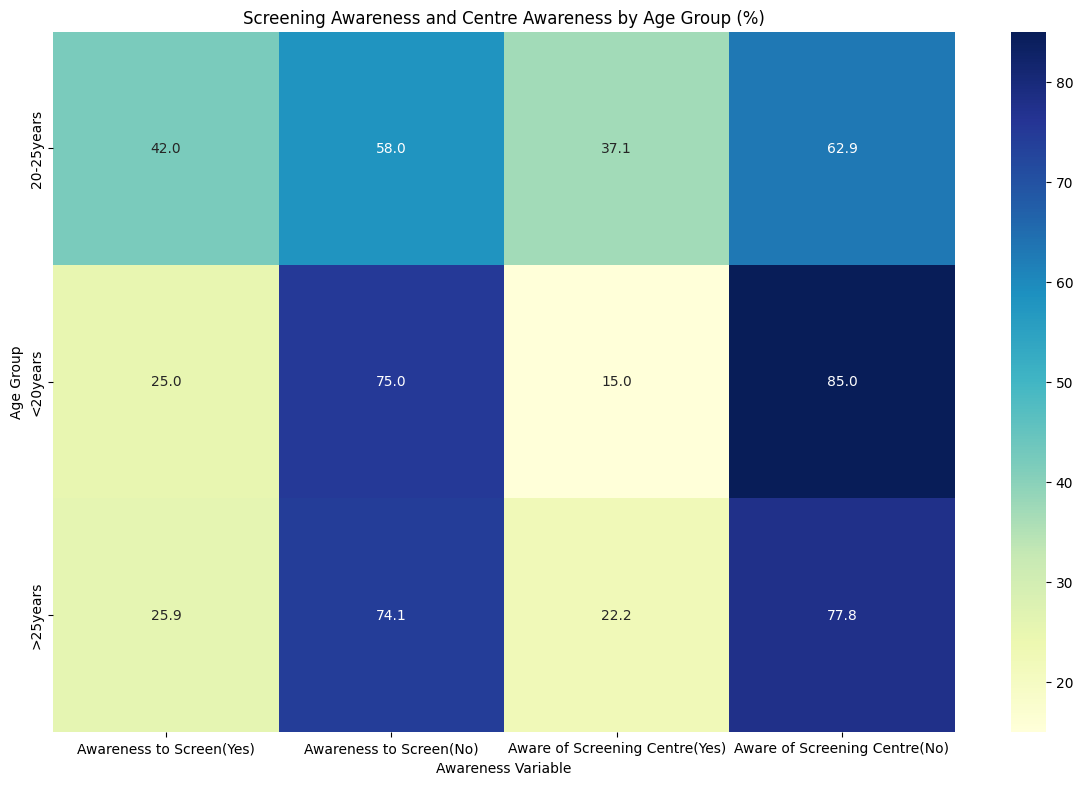

In [92]:

# age groups and awareness percentages
age_groups = ccan['agegrp'].unique()
age_groups.sort()

# Calculate percentages for each age group
heatmap_data = []
for age in age_groups:
    group = ccan[ccan['agegrp'] == age]
    everscrn = group['eva_told_to_scrn'].value_counts(normalize=True).reindex(['yes', 'no'], fill_value=0) * 100
    centaaware = group['aware_of_scrn_centa'].value_counts(normalize=True).reindex(['yes', 'no'], fill_value=0) * 100
    heatmap_data.append([
        everscrn['yes'], everscrn['no'],
        centaaware['yes'], centaaware['no']
    ])

heatmap_df = pd.DataFrame(
    heatmap_data,
    index=age_groups,
    columns=['Awareness to Screen(Yes)', 'Awareness to Screen(No)',
             'Aware of Screening Centre(Yes)', 'Aware of Screening Centre(No)']
)

# Plot heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_df, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Screening Awareness and Centre Awareness by Age Group (%)')
plt.ylabel('Age Group')
plt.xlabel('Awareness Variable')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()


### **2.1.3 Awareness vs Level of Study**
---
The heatmap shows that awareness of cervical cancer screening and knowledge of screening centres are generally low across all levels of study, with only about **38–41%** of students at each level reporting ever being told to screen and **31–37%** aware of a screening centre. There is no clear upward trend in awareness with increasing academic level, indicating that progression through higher levels of study does not substantially improve awareness.
___

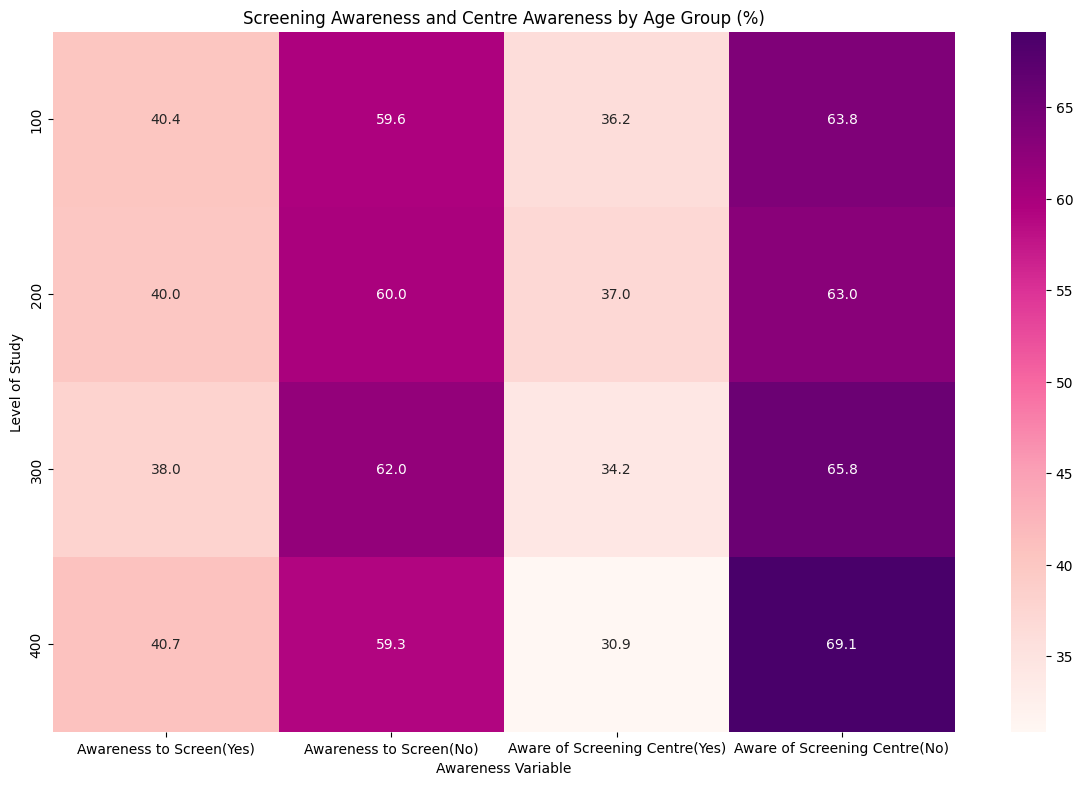

In [93]:

# level of study and awareness percentages
level = ccan['lev'].unique()
level.sort()

# Calculate percentages for each level of study
heatmap_data = []
for lev in level:
    group = ccan[ccan['lev'] == lev]
    everscrn = group['eva_told_to_scrn'].value_counts(normalize=True).reindex(['yes', 'no'], fill_value=0) * 100
    centaaware = group['aware_of_scrn_centa'].value_counts(normalize=True).reindex(['yes', 'no'], fill_value=0) * 100
    heatmap_data.append([
        everscrn['yes'], everscrn['no'],
        centaaware['yes'], centaaware['no']
    ])

heatmap_df = pd.DataFrame(
    heatmap_data,
    index=level,
    columns=['Awareness to Screen(Yes)', 'Awareness to Screen(No)',
             'Aware of Screening Centre(Yes)', 'Aware of Screening Centre(No)']
)

# Plot heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_df, annot=True, fmt=".1f", cmap="RdPu")
plt.title('Screening Awareness and Centre Awareness by Age Group (%)')
plt.ylabel('Level of Study')
plt.xlabel('Awareness Variable')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

---

# **3.0 Objective 2: Knowledge of Cervical Cancer** **Risk Factors, Prevention, Symptoms, and Screening Methods**

This section assessed participants’ knowledge across four domains: risk factors, prevention, symptoms, and screening methods for cervical cancer. The analysis included both Likert scale responses and summary scores.

**Likert scale response definision:**
(A = Agree)
(SA = Strongly Agree)
(D = Disagree)
(SD = Strongly Disagree)


---

##  **3.1 Knowledge on Cervical Cancer Risk Factors**

---

This section assesses students’ knowledge of key cervical cancer risk factors, including having multiple sexual partners, age, family history of cervical cancer, and unprotected sexual intercourse. The analysis shows that while most respondents correctly identified major risk factors, knowledge gaps remain for less commonly recognized factors. These findings highlight the importance of targeted educational interventions to address specific misconceptions and improve comprehensive understanding of cervical cancer risk factors among female tertiary students. Enhanced knowledge in this area is essential for effective prevention and early detection efforts.

---

| **Risk Factor Variables** | **Meaning**                                      |
|-------------------|--------------------------------------------------|
| `multiple_sexual_partners`        | Having multiple sexual partners                  |
| `age_factor`        | Age                                               |
| `hereditary_risk`       | Family history of cervical cancer                |
| `unprotected_sex`       | Having unprotected sexual intercourse            |


In [94]:
risk_factors = ccan[['multiple_sexual_partners', 'age_factor', 'hereditary_risk', 'unprotected_sex']].copy()
risk_factors

,multiple_sexual_partners,age_factor,hereditary_risk,unprotected_sex
0,SA,SA,SA,D
1,A,D,A,A
2,A,A,D,SA
3,D,SA,SA,D
4,SA,A,SA,SD
5,SD,SD,D,D
6,SA,SA,SA,D
7,SD,SD,D,D
8,A,A,A,D
9,SA,SA,SA,SA


In [95]:
for col in risk_factors.columns:
    print(f"Unique values in {col}:")
    print(risk_factors[col].unique())
    print()

Unique values in multiple_sexual_partners:
['SA' 'A' 'D' 'SD']

Unique values in age_factor:
['SA' 'D' 'A' 'SD']

Unique values in hereditary_risk:
['SA' 'A' 'D' 'SD']

Unique values in unprotected_sex:
['D' 'A' 'SA' 'SD']



In [96]:
#check for missing values
risk_factors.isna().sum()

multiple_sexual_partners    0
age_factor                  0
hereditary_risk             0
unprotected_sex             0
dtype: int64

In [97]:
#Recode the risk factors to binary values
Map_risk_factors = {'SD': 'D', 'D': 'D', 'A': 'A', 'SA': 'A'}
for col in risk_factors.columns:
        risk_factors[col] = risk_factors[col].map(Map_risk_factors)
        risk_factors[col] = pd.Categorical(risk_factors[col], categories=['D', 'A'], ordered=True)
        ccan[col] =  risk_factors[col]
risk_factors

,multiple_sexual_partners,age_factor,hereditary_risk,unprotected_sex
0,A,A,A,D
1,A,D,A,A
2,A,A,D,A
3,D,A,A,D
4,A,A,A,D
5,D,D,D,D
6,A,A,A,D
7,D,D,D,D
8,A,A,A,D
9,A,A,A,A


In [98]:
# Calculate the percentage of each risk factor item
risk_factors_perc = risk_factors.apply(lambda x: x.value_counts(normalize=True) * 100).round(2).T[['A', 'D']]
risk_factors_perc


,A,D
multiple_sexual_partners,66.670,33.330
age_factor,53.390,46.610
hereditary_risk,55.080,44.920
unprotected_sex,67.800,32.200


## **3.2 Knowledge on Cervical Cancer Prevention**

| **Prevention Variable** | **Meaning**                                                   |
|-------------------|---------------------------------------------------------------|
| `cancer_preventable`        | Cervical cancer can be prevented                              |
| `vaccination_prevents_cancer`        | Vaccination can prevent cervical cancer                       |
| `screening_reduces_risk`        | Regular screening can reduce the risk of cervical cancer      |
| `condom_reduces_risk`        | Using a condom during sex can reduce the risks of cervical cancer |



---
This section evaluates students’ knowledge of cervical cancer prevention, focusing on key preventive measures such as vaccination, regular screening, and condom use during sexual activity. The findings indicate that the majority of respondents recognized that cervical cancer can be prevented and were aware of the protective role of vaccination and regular screening. However, some knowledge gaps persist, particularly regarding the effectiveness of condom use in reducing risk. These results shows the importance of reinforcing comprehensive prevention education among female tertiary students to further enhance their understanding and adoption of preventive behaviors against cervical cancer.

---

In [99]:
# Create a Data for risk factors with percentages
knw_prevention = ccan[['cancer_preventable', 'vaccination_prevents_cancer', 'screening_reduces_risk', 'condom_reduces_risk']].copy()
knw_prevention

,cancer_preventable,vaccination_prevents_cancer,screening_reduces_risk,condom_reduces_risk
0,D,D,SA,D
1,SA,SA,SA,SA
2,SA,SA,SA,A
3,A,SA,SA,A
4,D,D,A,D
5,A,D,D,D
6,SA,SA,SA,D
7,D,D,D,SD
8,D,D,SD,A
9,SA,SA,SA,SA


In [100]:
#Recode the risk factors to binary values
Map_knw_prevention = {'SD': 'D', 'D': 'D', 'A': 'A', 'SA': 'A'}
for col in knw_prevention.columns:
        knw_prevention[col] = knw_prevention[col].map(Map_knw_prevention)
        knw_prevention[col] = pd.Categorical(knw_prevention[col], categories=['D', 'A'], ordered=True)
        ccan[col] =  knw_prevention[col]
knw_prevention

,cancer_preventable,vaccination_prevents_cancer,screening_reduces_risk,condom_reduces_risk
0,D,D,A,D
1,A,A,A,A
2,A,A,A,A
3,A,A,A,A
4,D,D,A,D
5,A,D,D,D
6,A,A,A,D
7,D,D,D,D
8,D,D,D,A
9,A,A,A,A


In [101]:
# Calculate the percentage of each knowledge item
knw_prevention_perc = knw_prevention.apply(lambda x: x.value_counts(normalize=True) * 100).round(2).T[['A', 'D']]
knw_prevention_perc

,A,D
cancer_preventable,76.270,23.730
vaccination_prevents_cancer,62.990,37.010
screening_reduces_risk,73.160,26.840
condom_reduces_risk,61.580,38.420


## **3.3 Knowledge on signs and symptoms of cervical cancer**

| **symptoms Variable** | **Meaning**                                                   |
|-------------------|---------------------------------------------------------------|
| `abnormal_menstrual_bleeding`        | Abnormal menstrual bleeding                                   |
| `general_body_pain`       | Pain in the entire body                                       |
| `intermenstrual_bleeding`       | Bleeding between menstrual period                             |
| `vaginal_itching`       | Itching of the vagina                                         |
| `foul_vaginal_discharge`       | Foul vaginal discharge                                        |
| `postmenopausal_bleeding`       | Bleeding after menopause                                      |
| `unexplained_weight_loss`       | Unexplained weight loss                                       |
| `persistent_diarrhea`       | Persistent diarrhea                                           |
| `blood_in_stool`       | Blood in stool                                                |
| `persistent_pelvic_pain`       | Persistent pelvic pain                                        |
| `bleeding_during_sex`       | Vaginal bleeding during sex                                   |


---
This section explores students’ knowledge of the signs and symptoms of cervical cancer, including abnormal menstrual bleeding, bleeding between periods, foul vaginal discharge, and persistent pelvic pain. The results indicate that while many respondents could identify common symptoms such as abnormal bleeding and foul discharge, awareness was lower for less typical symptoms like persistent diarrhea and blood in stool. These findings suggest that although general recognition of key symptoms is good, important knowledge gaps remain. Addressing these gaps through targeted education is essential to promote early detection and timely healthcare-seeking behavior among female tertiary students.

---

In [102]:

knw_symp = ccan[['abnormal_menstrual_bleeding', 'general_body_pain', 
                 'intermenstrual_bleeding', 'vaginal_itching', 'foul_vaginal_discharge',
                   'postmenopausal_bleeding', 'unexplained_weight_loss',
                   'persistent_diarrhea', 'blood_in_stool',
                     'persistent_pelvic_pain', 'bleeding_during_sex', ]].copy()
knw_symp

,abnormal_menstrual_bleeding,general_body_pain,intermenstrual_bleeding,vaginal_itching,foul_vaginal_discharge,postmenopausal_bleeding,unexplained_weight_loss,persistent_diarrhea,blood_in_stool,persistent_pelvic_pain,bleeding_during_sex
0,SA,SD,A,SA,SA,A,A,D,A,SA,SA
1,SA,SA,SA,SA,A,A,A,A,A,A,A
2,A,SA,SA,SA,A,A,A,D,D,SA,A
3,SA,A,SA,SA,SA,SA,A,D,D,A,A
4,D,A,A,A,A,A,A,D,A,A,A
5,D,D,A,A,SD,SD,SD,SD,D,D,D
6,A,D,D,A,A,A,SA,D,D,D,SA
7,SD,D,D,A,D,SD,SD,SD,A,D,A
8,A,SD,D,A,A,A,A,SA,SA,SA,SA
9,SA,SA,SA,SA,SA,SA,SA,SA,SA,SA,SA


In [103]:
#Recode the risk factors to binary values
Map_knw_symp = {'SD': 'D', 'D': 'D', 'A': 'A', 'SA': 'A'}
for col in knw_symp.columns:
        knw_symp[col] = knw_symp[col].map(Map_knw_symp)
        knw_symp[col] = pd.Categorical(knw_symp[col], categories=['D', 'A'], ordered=True)
        ccan[col] =  knw_symp[col]
knw_symp

,abnormal_menstrual_bleeding,general_body_pain,intermenstrual_bleeding,vaginal_itching,foul_vaginal_discharge,postmenopausal_bleeding,unexplained_weight_loss,persistent_diarrhea,blood_in_stool,persistent_pelvic_pain,bleeding_during_sex
0,A,D,A,A,A,A,A,D,A,A,A
1,A,A,A,A,A,A,A,A,A,A,A
2,A,A,A,A,A,A,A,D,D,A,A
3,A,A,A,A,A,A,A,D,D,A,A
4,D,A,A,A,A,A,A,D,A,A,A
5,D,D,A,A,D,D,D,D,D,D,D
6,A,D,D,A,A,A,A,D,D,D,A
7,D,D,D,A,D,D,D,D,A,D,A
8,A,D,D,A,A,A,A,A,A,A,A
9,A,A,A,A,A,A,A,A,A,A,A


In [104]:
# Calculate the percentage of each symptoms of cervical cancer
knw_symp_perc = knw_symp.apply(lambda x: x.value_counts(normalize=True) * 100).round(2).T[['A', 'D']]
knw_symp_perc

,A,D
abnormal_menstrual_bleeding,66.100,33.900
general_body_pain,48.590,51.410
intermenstrual_bleeding,69.210,30.790
vaginal_itching,72.880,27.120
foul_vaginal_discharge,72.600,27.400
postmenopausal_bleeding,66.380,33.620
unexplained_weight_loss,57.340,42.660
persistent_diarrhea,43.790,56.210
blood_in_stool,54.240,45.760
persistent_pelvic_pain,72.600,27.400


## **3.4 Knowledge on Cervical Cancer Screening**

| **Cervical Cancer Screening Variable**   | **Meaning**                                                                 |
|---------------------|------------------------------------------------------------------------------|
| `knows_screening_center`      | Know any cervical screening center                                           |
| `screen_from_age_21`      | Screening starts from age 21                                                 |
| `screen_every_2_years`      | A woman should be screened at 2-year intervals                               |
| `screening_for_healthy`      | Cervical cancer screening is for those who are not sick                      |
| `screening_for_early_detection`      | Cervical cancer screening is for early detection of cancer                   |
| `detection_can_prevent_cancer`      | When cervical cancer is detected at screening, it can be prevented           |
| `regular_screening_helps_detection`     | Regular screening helps early detection                                      |







---

This section assesses students’ knowledge of cervical cancer screening, including awareness of screening centres, recommended starting age, screening intervals, and the purpose of screening. The analysis shows that while many respondents recognized the importance of regular screening and its role in early detection, fewer were familiar with specific guidelines such as the recommended age to begin screening or appropriate screening intervals. Additionally, knowledge about who should be screened and the preventive benefits of early detection was moderate. These findings highlight the need for enhanced education on practical screening guidelines and the benefits of early and regular cervical cancer screening among female tertiary students.

---

___

| `screen_every_2_years`      | A woman should be screened at 2-year intervals                               |
----------------------- |---------------------------------------------
___

For this question( A woman should be screened at 2-year intervals), 
It is recommended by quidelines that a wooman screens for cervical cancer every 3-5 years
so we will recode 'SD' and 'D' as 'A' (Agree/Strongly Agree) and 'A' and 'SA' as 'D' (Disagree/Strongly Disagree)

In [105]:
# Recode the knowledge of cervical cancer screening to binary values
ccan['screen_every_2_years'] = ccan['screen_every_2_years'].replace({'SD': 'A', 'D': 'A', 'A': 'D', 'SA': 'D'})

# Create a DataFrame for knowledge of cervical cancer screening
knw_can_scrn = ccan[['knows_screening_center', 'screen_from_age_21', 'screen_every_2_years',
                       'screening_for_healthy','screening_for_early_detection',
                         'detection_can_prevent_cancer','regular_screening_helps_detection']].copy()
knw_can_scrn

,knows_screening_center,screen_from_age_21,screen_every_2_years,screening_for_healthy,screening_for_early_detection,detection_can_prevent_cancer,regular_screening_helps_detection
0,SD,SA,D,A,A,SA,A
1,A,A,D,A,SD,D,D
2,SA,A,A,D,D,D,A
3,SA,SA,D,SD,SA,D,SA
4,SD,A,D,A,A,A,A
5,SD,D,A,SD,D,A,SA
6,SA,A,D,D,SA,SA,SA
7,A,SD,A,SD,D,D,SD
8,SD,A,D,SD,SD,SD,A
9,A,A,D,SA,SA,SA,SA


In [106]:
#Create a mapping dictionary to recode the knowledge of cervical cancer screening
# 'SD' and 'D' to 'A', 'A' and 'SA' to 'D'
map_knw_can_scrn = {'SD' : 'A', 'D' : 'A', 'A': 'D', 'SA' : 'D'}
for col in knw_can_scrn.columns:
    knw_can_scrn[col] = knw_can_scrn[col].map(map_knw_can_scrn)
    knw_can_scrn[col] = pd.Categorical(knw_can_scrn[col],categories=['D','A'], ordered=True)
    ccan[col] = knw_can_scrn[col]
knw_can_scrn

,knows_screening_center,screen_from_age_21,screen_every_2_years,screening_for_healthy,screening_for_early_detection,detection_can_prevent_cancer,regular_screening_helps_detection
0,A,D,A,D,D,D,D
1,D,D,A,D,A,A,A
2,D,D,D,A,A,A,D
3,D,D,A,A,D,A,D
4,A,D,A,D,D,D,D
5,A,A,D,A,A,D,D
6,D,D,A,A,D,D,D
7,D,A,D,A,A,A,A
8,A,D,A,A,A,A,D
9,D,D,A,D,D,D,D


In [107]:
# Calculate the frequency and percentage of each knowledge of cervical cancer screening item
knw_can_scrn_perc = knw_can_scrn.apply(lambda x:x.value_counts(normalize=True)*100). round(2).T[['D','A']]
knw_can_scrn_perc

,D,A
knows_screening_center,53.670,46.330
screen_from_age_21,70.340,29.660
screen_every_2_years,37.570,62.430
screening_for_healthy,50.000,50.000
screening_for_early_detection,64.120,35.880
detection_can_prevent_cancer,72.030,27.970
regular_screening_helps_detection,77.680,22.320


## **3.5 Knowledge of screening methods**

| **screening methods Variable**   | **Meaning**                                                          |
|---------------------|-----------------------------------------------------------------------|
| `visual_is_one_method`      | Visual Inspection is one method for cervical cancer screening         |
| `visual_only_method`      | Visual Inspection is the only screening method                        |
| `visual_is_easiest_method`      | Visual Inspection is the easiest screening method                     |
| `visual_at_any_level`     | Visual Inspection can be done at any level                            |



---
This section assessed students’ knowledge of specific cervical cancer screening methods, with a focus on Visual Inspection techniques. The findings indicate that while a proportion of respondents recognized Visual Inspection as one method for cervical cancer screening, fewer correctly identified that it is not the only or necessarily the easiest method. Additionally, knowledge about the applicability of Visual Inspection across different healthcare levels was limited. These results highlight persistent gaps in understanding the range and characteristics of available screening methods among female tertiary students. Addressing these gaps through targeted educational interventions is essential to ensure informed decision-making and to promote the uptake of appropriate screening services.

---

___
| `visual_only_method`      | Visual Inspection is the only screening method                        |
----------------------- |---------------------------------------------
___

For this question( Visual Inspection is the only screening method ), 
Visual inspection is not the only screening method there are other methods such as Pap Smear (Papanicolaou Test)
so we will recode 'SD' and 'D' as 'A' (Agree/Strongly Agree) and 'A' and 'SA' as 'D' (Disagree/Strongly Disagree)

In [108]:
# Recode the knowledge of cervical cancer screening to binary values
ccan['visual_only_method'] = ccan['visual_only_method'].replace({'SD': 'A', 'D': 'A', 'A': 'D', 'SA': 'D'})
# Create a DataFrame for knowledge of cervical cancer screening methods
knw_can_scrn_methd = ccan[['visual_is_one_method','visual_only_method' ,'visual_is_easiest_method', 'visual_at_any_level']].copy()
knw_can_scrn_methd

,visual_is_one_method,visual_only_method,visual_is_easiest_method,visual_at_any_level
0,D,A,A,SA
1,A,D,A,D
2,A,A,SA,D
3,A,A,A,D
4,D,A,SD,SD
5,SD,A,SD,D
6,SA,A,SA,D
7,SD,A,D,SD
8,SD,A,D,SD
9,D,A,A,SA


In [109]:
3# Create a mapping dictionary to recode the knowledge of cervical cancer screening methods
# 'SD' and 'D' to 'D', 'A' and 'SA' to 'A'
map_knw_can_scrn_methd = {'SD' : 'D', 'D' : 'D', 'A': 'A', 'SA' : 'A'}
for col in knw_can_scrn_methd.columns:
    knw_can_scrn_methd[col] = knw_can_scrn_methd[col].map(map_knw_can_scrn_methd)
    knw_can_scrn_methd[col] = pd.Categorical(knw_can_scrn_methd[col],categories=['D',"A"], ordered=True)
    ccan[col] = knw_can_scrn_methd[col]
knw_can_scrn_methd

,visual_is_one_method,visual_only_method,visual_is_easiest_method,visual_at_any_level
0,D,A,A,A
1,A,D,A,D
2,A,A,A,D
3,A,A,A,D
4,D,A,D,D
5,D,A,D,D
6,A,A,A,D
7,D,A,D,D
8,D,A,D,D
9,D,A,A,A


In [110]:
# Calculate the frequency and percentage of each knowledge of cervical cancer screening methods item
knw_can_scrn_methd_perc = knw_can_scrn_methd.apply(lambda x:x.value_counts(normalize=True)*100).round(2).T[['D','A']]
knw_can_scrn_methd_perc

,D,A
visual_is_one_method,39.270,60.730
visual_only_method,43.220,56.780
visual_is_easiest_method,42.940,57.060
visual_at_any_level,45.480,54.520


###  **3.5.1 Diverging Bar Chart of all knowledge Domain items** 

---
The diverging bar charts provide a comprehensive visualization of students’ knowledge across key domains related to cervical cancer: risk factors, symptoms, screening, and screening methods. Each bar represents the proportion of respondents who agreed (good knowledge) or disagreed (poor knowledge) with specific knowledge items.

The charts reveal that knowledge is highest for risk factors and prevention, with a majority of students correctly identifying major risk factors and preventive measures. However, there are notable gaps in knowledge regarding symptoms and especially screening methods, where the proportion of disagreement is higher. This pattern suggests that while general awareness of cervical cancer exists, detailed understanding—particularly of symptoms and practical screening procedures—remains poor.

---

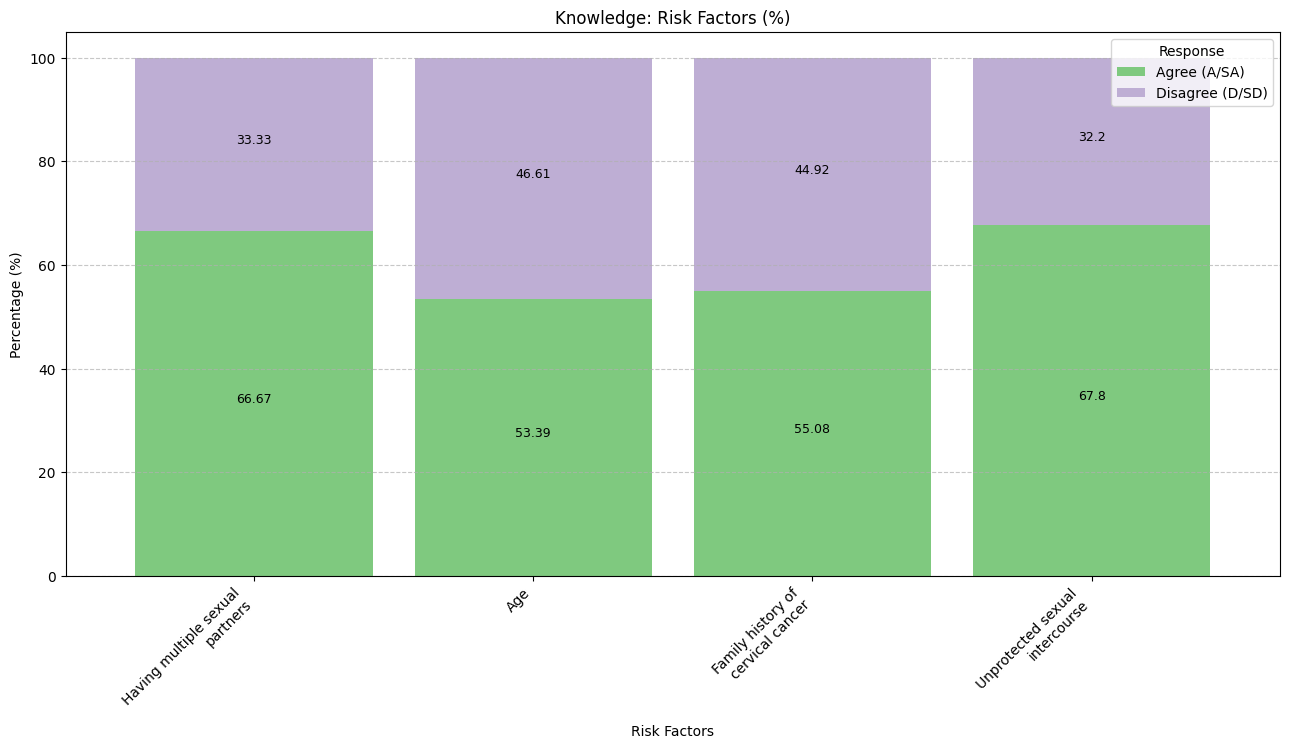

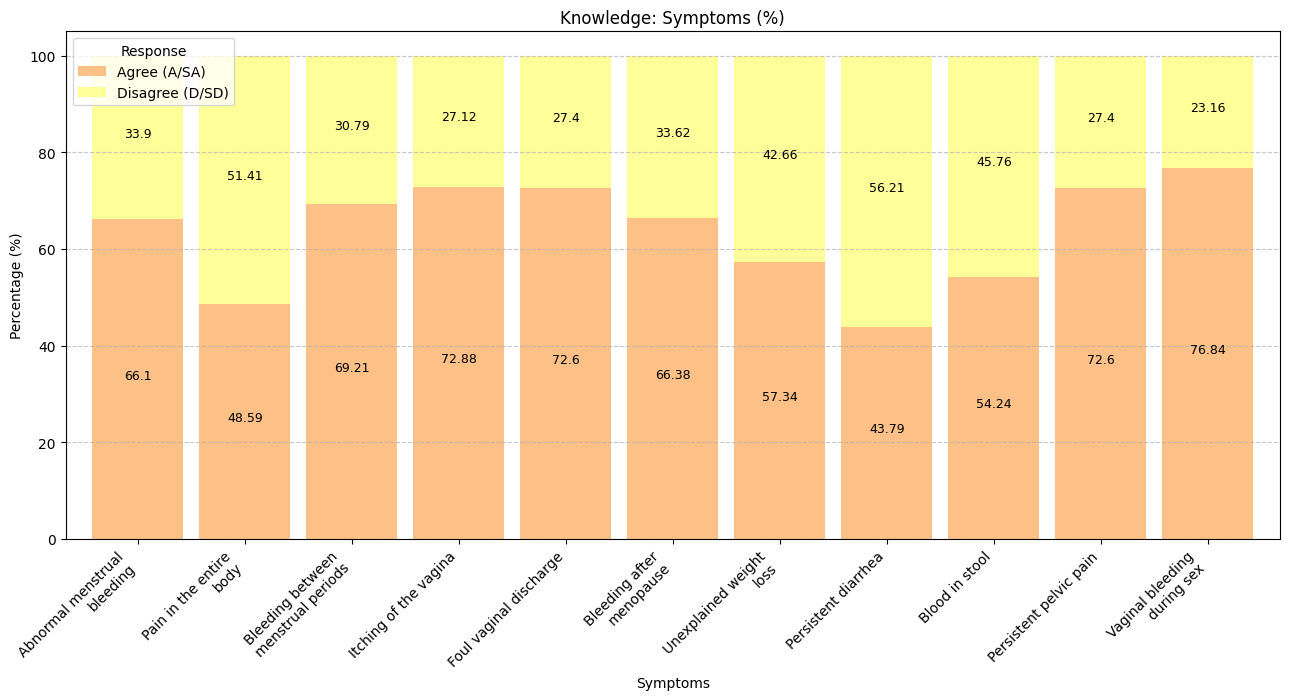

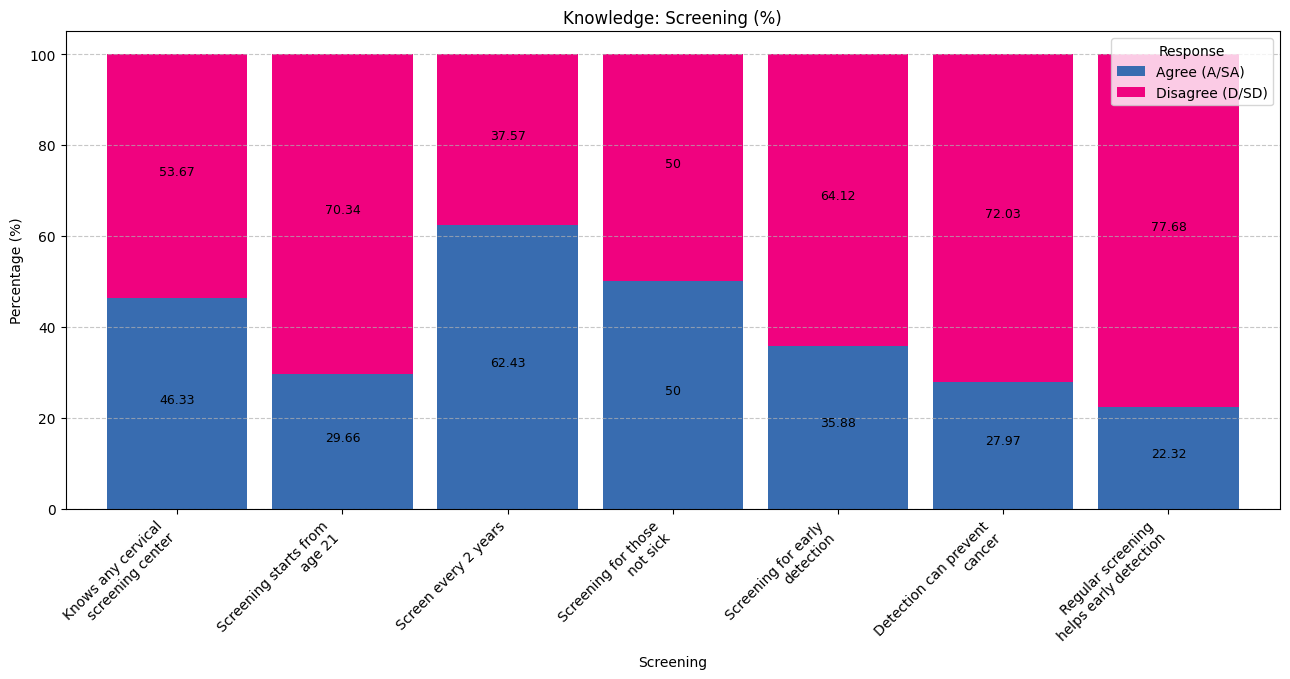

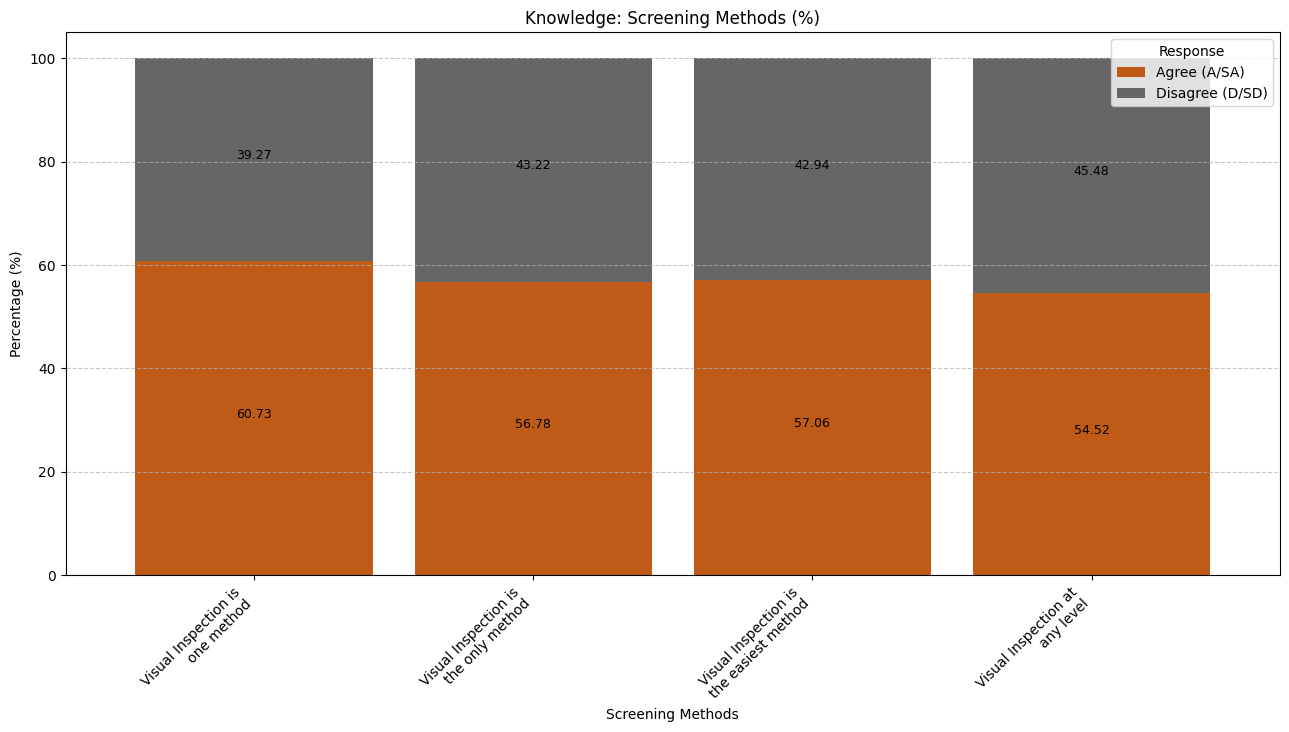

In [111]:
# Define variable descriptions for each domain
risk_factors_labels = {
    'multiple_sexual_partners': 'Having multiple sexual partners',
    'age_factor': 'Age',
    'hereditary_risk': 'Family history of cervical cancer',
    'unprotected_sex': 'Unprotected sexual intercourse'
}
symptoms_labels = {
    'abnormal_menstrual_bleeding': 'Abnormal menstrual bleeding',
    'general_body_pain': 'Pain in the entire body',
    'intermenstrual_bleeding': 'Bleeding between menstrual periods',
    'vaginal_itching': 'Itching of the vagina',
    'foul_vaginal_discharge': 'Foul vaginal discharge',
    'postmenopausal_bleeding': 'Bleeding after menopause',
    'unexplained_weight_loss': 'Unexplained weight loss',
    'persistent_diarrhea': 'Persistent diarrhea',
    'blood_in_stool': 'Blood in stool',
    'persistent_pelvic_pain': 'Persistent pelvic pain',
    'bleeding_during_sex': 'Vaginal bleeding during sex'
}
screening_labels = {
    'knows_screening_center': 'Knows any cervical screening center',
    'screen_from_age_21': 'Screening starts from age 21',
    'screen_every_2_years': 'Screen every 2 years',
    'screening_for_healthy': 'Screening for those not sick',
    'screening_for_early_detection': 'Screening for early detection',
    'detection_can_prevent_cancer': 'Detection can prevent cancer',
    'regular_screening_helps_detection': 'Regular screening helps early detection'
}
screening_methods_labels = {
    'visual_is_one_method': 'Visual Inspection is one method',
    'visual_only_method': 'Visual Inspection is the only method',
    'visual_is_easiest_method': 'Visual Inspection is the easiest method',
    'visual_at_any_level': 'Visual Inspection at any level'
}

# List of dataframes for each domain (already computed in previous cells)
domain_data = [
    ("Risk Factors", risk_factors_perc, risk_factors_labels),
    ("Symptoms", knw_symp_perc, symptoms_labels),
    ("Screening", knw_can_scrn_perc, screening_labels),
    ("Screening Methods", knw_can_scrn_methd_perc, screening_methods_labels)
]

# Define color palettes for each domain
color_palettes = [
    ['#7fc97f', '#beaed4'],  # Risk Factors
    ['#fdc086', '#ffff99'],  # Symptoms
    ['#386cb0', '#f0027f'],  # Screening
    ['#bf5b17', '#666666']   # Screening Methods
]

for (title, domain, label_map), colors in zip(domain_data, color_palettes):
    plt.figure(figsize=(13, 8))
    ax = plt.gca()
    domain[['A', 'D']].plot(
        kind='bar',
        stacked=True,
        color=colors,
        ax=ax,
        width=0.85
    )
    plt.title(f'Knowledge: {title} (%)')
    plt.ylabel('Percentage (%)')
    plt.xlabel(title)
    plt.legend(['Agree (A/SA)', 'Disagree (D/SD)'], title='Response')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # Wrap and rotate labels for readability
    labels = [textwrap.fill(label_map.get(var, var), 22) for var in domain.index]
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
    for container in ax.containers:
        plt.bar_label(container, label_type='center', fontsize=9, padding=3, color='black')
    plt.show()

### **3.5.2 Good and Poor knowledge score of all Domains**

___
The findings indicate that knowledge of cervical cancer among respondents varies across different domains. The highest proportion of good knowledge was observed in the prevention domain (65.0%), followed by screening (59.9%) and risk factors (55.4%). Knowledge of symptoms was moderate (50.6%), while knowledge of screening methods was the lowest (45.2%), with more than half of respondents demonstrating poor knowledge in this area. Overall, just over half (52.0%) of participants exhibited good knowledge of cervical cancer.
___

In [112]:
# Compute Good/Poor knowledge totals and percentages for each domain and overall
domains = [
    ('risk_factors', 'Risk Factors'),
    ('knw_prevention', 'Prevention'),
    ('knw_symp', 'Symptoms'),
    ('knw_can_scrn', 'Screening'),
    ('knw_can_scrn_methd', 'Screening Methods')
]

results = []
n = len(risk_factors)  # All domains have same number of rows

for domain_names, label in domains:
    domain_data = globals()[domain_names]
    # Good knowledge: 'A', Poor knowledge: 'D'
    good = (domain_data == 'A').sum(axis=1)
    mean_score = good.mean()
    good_n = (good >= mean_score).sum()
    poor_n = n - good_n
    good_perc = good_n / n * 100
    poor_perc = poor_n / n * 100
    results.append({
        'Domain': label,
        'Good Knowledge (n)': good_n,
        'Good Knowledge (%)': round(good_perc, 1),
        'Poor Knowledge (n)': poor_n,
        'Poor Knowledge (%)': round(poor_perc, 1)
    })

# Overall knowledge: mean of all domain scores per participant
all_scores = np.column_stack([
    (globals()[domain_names] == 'A').sum(axis=1) for domain_names, _ in domains
])
overall_score = all_scores.mean(axis=1)
overall_mean = overall_score.mean()
overall_good = (overall_score >= overall_mean).sum()
overall_poor = n - overall_good
overall_good_perc = overall_good / n * 100
overall_poor_perc = overall_poor / n * 100
results.append({
    'Domain': 'Overall',
    'Good Knowledge (n)': overall_good,
    'Good Knowledge (%)': round(overall_good_perc, 1),
    'Poor Knowledge (n)': overall_poor,
    'Poor Knowledge (%)': round(overall_poor_perc, 1)
})

domain_goodpoor = pd.DataFrame(results)
display(domain_goodpoor)


,Domain,Good Knowledge (n),Good Knowledge (%),Poor Knowledge (n),Poor Knowledge (%)
0,Risk Factors,196,55.400,158,44.600
1,Prevention,230,65.000,124,35.000
2,Symptoms,179,50.600,175,49.400
3,Screening,183,51.700,171,48.300
4,Screening Methods,160,45.200,194,54.800
5,Overall,195,55.100,159,44.900


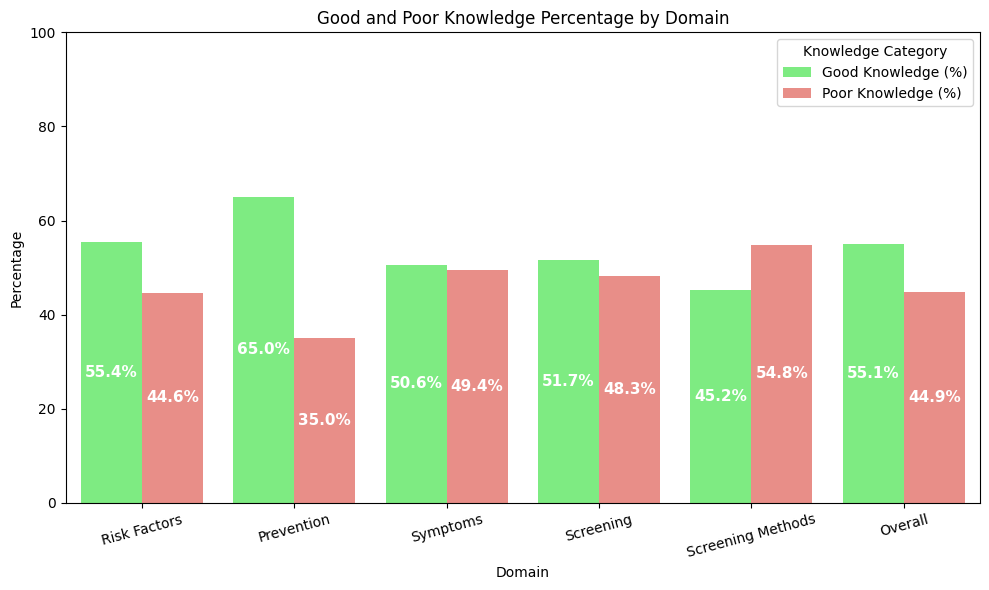

In [113]:
# Plot Good and Poor Knowledge Percentages by Domain using seaborn column (grouped) bar chart
# Prepare data 
plot = domain_goodpoor.melt(
    id_vars='Domain',
    value_vars=['Good Knowledge (%)', 'Poor Knowledge (%)'],
    var_name='Knowledge Category',
    value_name='Percentage'
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=plot,
    x='Domain',
    y='Percentage',
    hue='Knowledge Category',
    palette=["#6CFD71", "#F88078"]
)

plt.ylabel('Percentage')
plt.title('Good and Poor Knowledge Percentage by Domain')
plt.ylim(0, 100)
plt.xticks(rotation=15)
plt.legend(title='Knowledge Category')
plt.tight_layout()

# Add centered percentage labels
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height) and height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height / 2,
            f'{height:.1f}%',
            ha='center',
            va='center',
            color='white',
            fontsize=11,
            fontweight='bold'
        )

plt.show()


### **3.5.3 Overall Good and Poor knowledge score**

In [114]:
# Each domain: risk_factors, knw_prevention, knw_symp, knw_can_scrn, knw_can_scrn_methd
domain_scores = [
    risk_factors.apply(lambda x: (x == 'A').sum(), axis=1),
    knw_prevention.apply(lambda x: (x == 'A').sum(), axis=1),
    knw_symp.apply(lambda x: (x == 'A').sum(), axis=1),
    knw_can_scrn.apply(lambda x: (x == 'A').sum(), axis=1),
    knw_can_scrn_methd.apply(lambda x: (x == 'A').sum(), axis=1)
]

# Compute the mean score across all domains for each participant
ccan['overall_knowledge_score'] = np.mean(domain_scores, axis=0)

# Use the mean overall score as threshold for Good/Poor knowledge
overall_mean = ccan['overall_knowledge_score'].mean()
ccan['overall_knowledge_good'] = (ccan['overall_knowledge_score'] >= overall_mean).astype(int)

# Compute totals and percentages
good_n = ccan['overall_knowledge_good'].sum()
poor_n = len(ccan) - good_n
good_perc = good_n / len(ccan) * 100
poor_perc = poor_n / len(ccan) * 100

overall_knowledge_summary = pd.DataFrame({
    'Category': ['Good Knowledge', 'Poor Knowledge'],
    'Count': [good_n, poor_n],
    'Percentage': [round(good_perc, 1), round(poor_perc, 1)]
})

display(overall_knowledge_summary)

,Category,Count,Percentage
0,Good Knowledge,195,55.100
1,Poor Knowledge,159,44.900


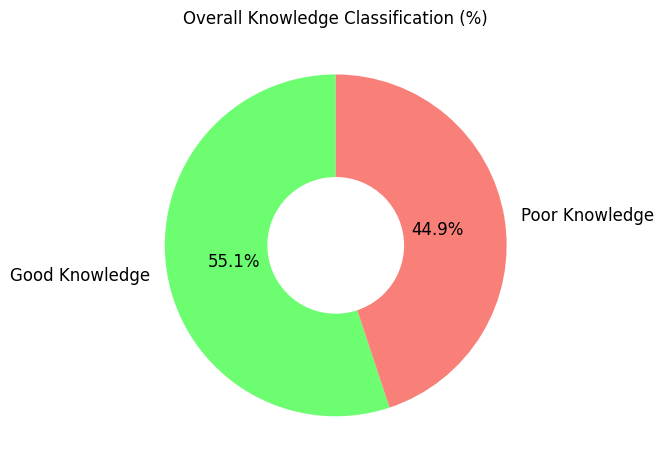

In [115]:
# Donut chart for overall_knowledge_summary
labels = overall_knowledge_summary['Category']
sizes = overall_knowledge_summary['Percentage']
colors = ["#6CFD71", "#F88078"]

plt.figure(figsize=(6, 5))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Overall Knowledge Classification (%)')
plt.tight_layout()
# Draw a white circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
plt.gca().add_artist(centre_circle)
plt.show()

# **4.0 Objective 3: To explore attitudes and perceptions toward cervical cancer screening among students**


---

## **4.1 Attitude/Willingness Towards Screening**

Attitudes and willingness to participate in cervical cancer screening were assessed using three key variables: being given the opportunity to screen, perception of pain associated with screening, and perceived permission to undergo screening.


**Classification of Attitude/willingness and Perception Variables**

- **Attitude/willingness variables:**
  - `giv_oportu_to_scrn`: Willingness to take the opportunity to screen (reflects attitude).
  - `painful_scrn`: Belief about whether screening is painful (reflects attitude).

- **Perception variable:**
  - `permis_to_scrn`: Perceived permission or from relative/parent/guardian before screening(reflects perception).
_ _ _

In [116]:
#attitude/willingness towards cervical cancer screening
atd_percept = ccan[['giv_oportu_to_scrn', 'painful_scrn', 'permis_to_scrn']].copy()
atd_percept 


,giv_oportu_to_scrn,painful_scrn,permis_to_scrn
0,no,NaN,no
1,no,NaN,no
2,yes,NaN,yes
3,yes,NaN,no
4,yes,NaN,yes
5,yes,no,no
6,yes,NaN,no
7,no,NaN,no
8,yes,NaN,yes
9,no,NaN,no


### **4.1.1 Bar Chart of Attitude and Perception Toward Cervical Cancer Screening**

___
The results illustrate the relationship between attitudes/perceptions and the uptake of cervical cancer screening. Uptake was significantly higher among respondents who reported being given the opportunity to screen (66.4%) compared to those who were not (33.6%). Conversely, perceived pain was associated with lower uptake, as only 37.5% of those who considered screening painful proceeded with it, while 62.5% did not. Furthermore, uptake was lowest among those who felt they did not have permission or support to screen (24.9%), with 75.1% not participating.
___

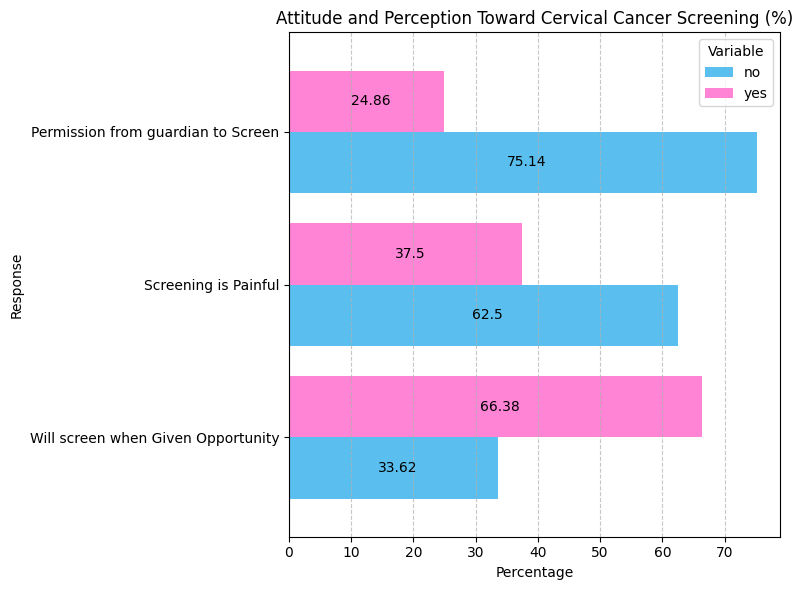

In [117]:
atd_percept_labels = {
    'giv_oportu_to_scrn': 'Will screen when Given Opportunity',
    'painful_scrn': 'Screening is Painful',
    'permis_to_scrn': 'Permission from guardian to Screen'
}

# Calculate percentages for each column in attitude_perception
atd_percept_perc = atd_percept.apply(lambda x: x.value_counts(normalize=True) * 100).round(2)

# Rename columns for plotting
atd_percept_perc = atd_percept_perc.rename(columns=atd_percept_labels)

# Horizontal bar chart for attitude and perception variables
atd_percept_perc.T.plot(
    kind='barh',
    figsize=(8, 6),
    color=["#5abfee", "#ff84d6"],
    width=0.8
)
plt.title('Attitude and Perception Toward Cervical Cancer Screening (%)')
plt.xlabel('Percentage')
plt.ylabel('Response')
plt.legend(title='Variable')
plt.tight_layout()
plt.yticks(rotation=0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for container in plt.gca().containers:
    plt.bar_label(container, label_type='center', fontsize=10, padding=3, color='black')
plt.show()

# **5.0 Cervical Cancer Screening Uptake**

___
The results reveal a low uptake of cervical cancer screening among respondents, with only 13.6% reporting participation in screening, while the vast majority (86.4%) have not undergone screening. 
___

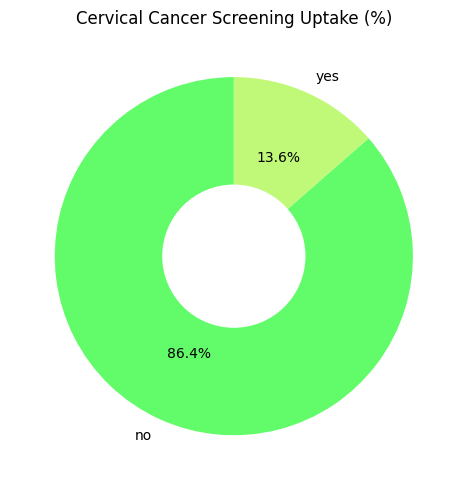

In [118]:
# Calculate Uptake_summary
Uptake_summary = ccan['Uptake'].value_counts().reset_index()
Uptake_summary.columns = ['Uptake', 'Counts']
Uptake_summary['Percentage'] = (Uptake_summary['Counts'] / Uptake_summary['Counts'].sum() * 100).round(1)

# Prepare data for donut chart
uptake_labels = Uptake_summary['Uptake'].tolist()
uptake_sizes = Uptake_summary['Counts'].tolist()
uptake_colors = ["#62fc6a", "#c0f877"]

plt.figure(figsize=(6, 5))
wedges, texts, autotexts = plt.pie(
    uptake_sizes,
    labels=uptake_labels,
    colors=uptake_colors,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Cervical Cancer Screening Uptake (%)')
plt.tight_layout()
# Draw a white circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
plt.gca().add_artist(centre_circle)
plt.show()

## **5.1 Cervical cancer screening uptake by level of study and Affiliation among female tertiary students**

___
The figure shows cervical cancer screening uptake by level of study and institutional affiliation among female tertiary students. Screening uptake was generally low, ranging from 8.9% to 18.0% across academic levels and 8.1% to 17.6% across affiliations. The highest uptake was observed among 200-level students (18.0%) and students affiliated with UHAS (17.6%). Despite these differences, overall participation remains suboptimal.

Regarding payment, the majority of students indicated a willingness to pay at least 20 Ghana cedis (USD 1.30) [77.1%], while a smaller proportion preferred free screening (16.7%). For preferred payment, most selected either free (43.8%) or 20–50 Ghana cedis (USD 1.30–3.25) (39.6%), with very few willing to pay higher amounts. These findings highlight that affordability (20 GHS ≈ USD 1.30) is a key consideration, and offering screening at low or no cost may help reduce financial barriers and improve uptake.
___

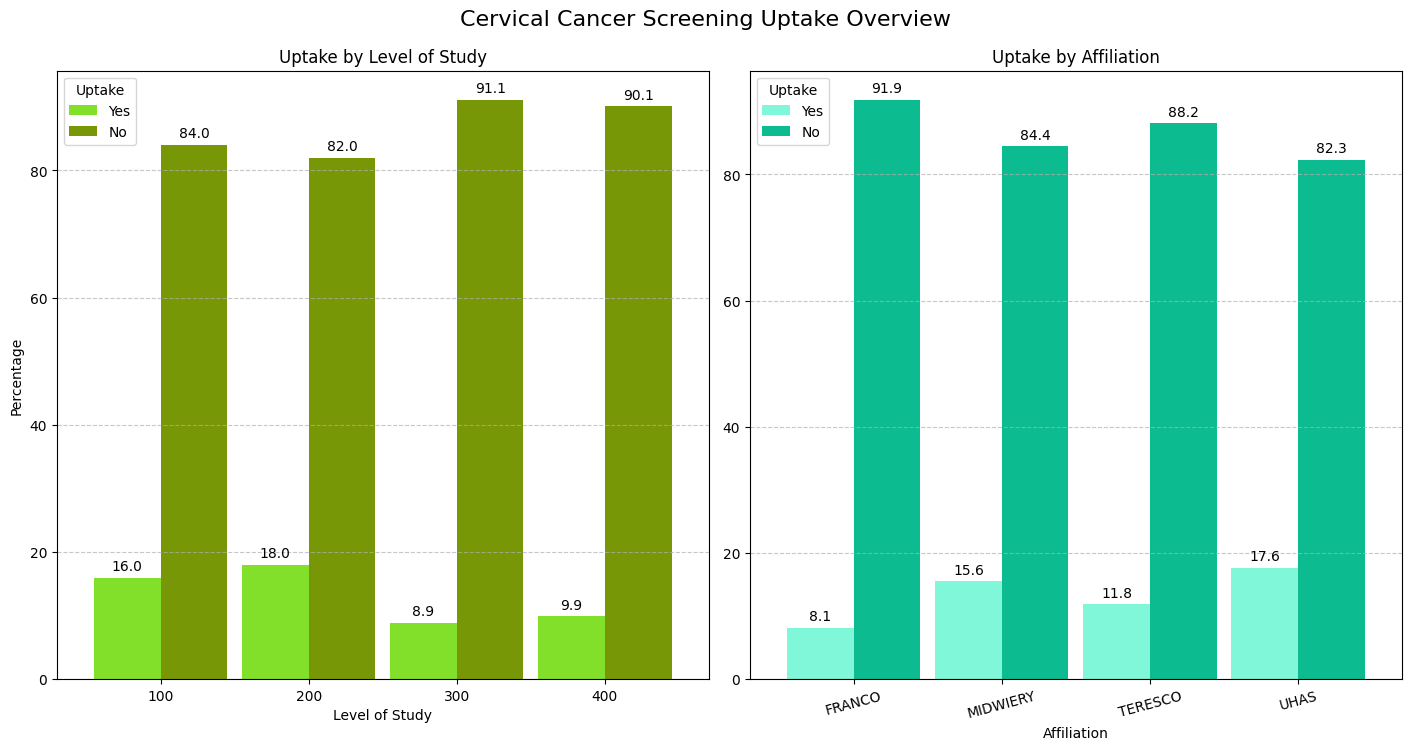

In [119]:
# Calculate uptake by level of study (percentage)
uptake_by_lev = (
    ccan.groupby('lev')['Uptake']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    .mul(100)
    .round(2)
)

fig = plt.figure(constrained_layout=True, figsize=(14, 7))
gs = fig.add_gridspec(1, 2, width_ratios=[1.2, 1.2])

# Grouped bar for uptake by level of study
ax0 = fig.add_subplot(gs[0, 0])
uptake_by_lev[['yes', 'no']].plot(
    kind='bar',
    ax=ax0,
    color=["#82e02a", "#789706"],
    width=0.9
)
ax0.set_title('Uptake by Level of Study')
ax0.set_xlabel('Level of Study')
ax0.set_ylabel('Percentage')
ax0.legend(['Yes', 'No'], title='Uptake')
ax0.set_xticklabels(uptake_by_lev.index.astype(str), rotation=0)
ax0.grid(axis='y', linestyle='--', alpha=0.7)
for container in ax0.containers:
    ax0.bar_label(container, fmt='%.1f', padding=3)

# Calculate uptake by affiliation (percentage)
uptake_by_aff = (
    ccan.groupby('affiliation')['Uptake']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    .mul(100)
    .round(2)
)

# Grouped bar for uptake by affiliation
ax1 = fig.add_subplot(gs[0, 1])
uptake_by_aff[['yes', 'no']].plot(
    kind='bar',
    ax=ax1,
    color=["#80f7d9", "#0cbb8f"],
    width=.9
)
ax1.set_title('Uptake by Affiliation')
ax1.set_xlabel('Affiliation')
ax1.legend(['Yes', 'No'], title='Uptake')
ax1.set_xticklabels(uptake_by_aff.index.astype(str), rotation=15)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f', padding=3)

plt.suptitle('Cervical Cancer Screening Uptake Overview', fontsize=16, y=1.05)
#plt.tight_layout()
plt.show()


## **5.2 Comparison of Amount Willing to Pay vs. Preferred Amount for Cervical Cancer Screening**

___

A comparison between the amount students are willing to pay (`amtpay_02`) and their preferred amount for screening (`amt_pref_pay_for_scrn`) illustrates the distribution of amounts female tertiary students are willing to pay and their preferred payment for cervical cancer screening. The majority indicated a willingness to pay at least 20 Ghana cedis (77.1%), while a smaller proportion preferred free screening (16.7%). For preferred payment, most students selected either free (43.8%) or 20–50 Ghana cedis (39.6%), with very few willing to pay higher amounts. These findings highlight that affordability is a key consideration for this population, and offering screening at low or no cost may help reduce financial barriers and improve uptake.
___

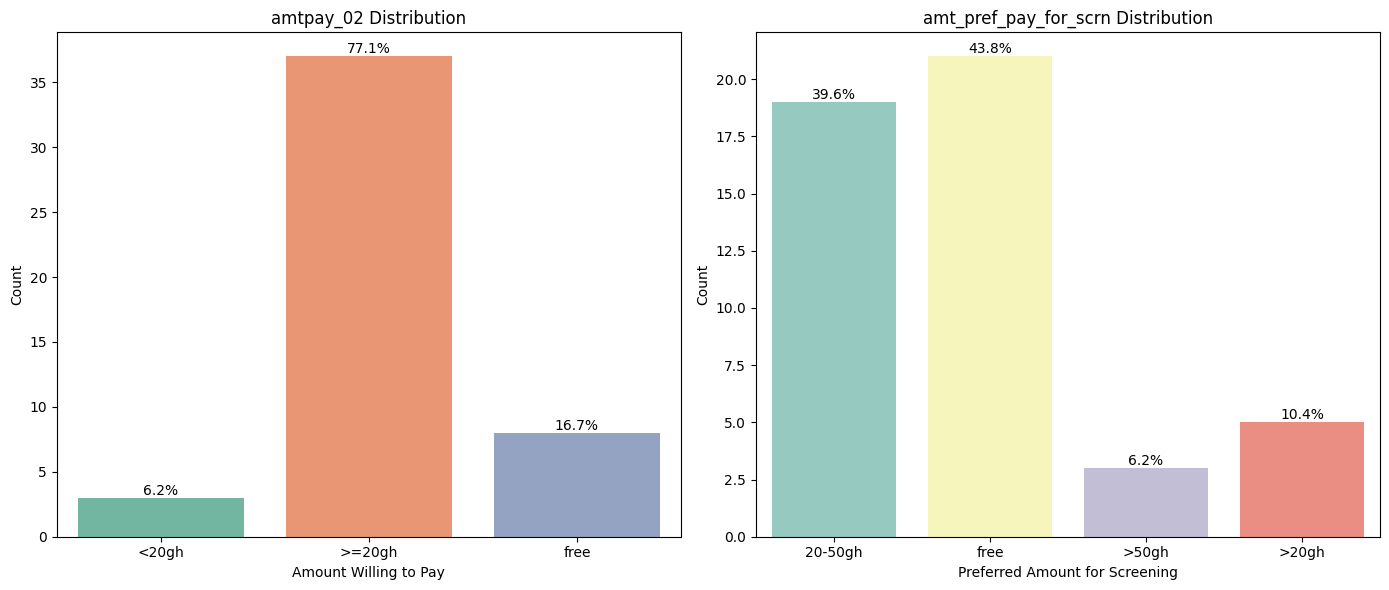

In [120]:
# Drop missing values for a fair comparison
compare_df = ccan[['amtpay_02', 'amt_pref_pay_for_scrn']].dropna().sort_values(by='amtpay_02')

# Check data types
if np.issubdtype(compare_df['amtpay_02'].dtype, np.number) and np.issubdtype(compare_df['amt_pref_pay_for_scrn'].dtype, np.number):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    # Boxplot comparison
    box = compare_df.boxplot(column=['amtpay_02', 'amt_pref_pay_for_scrn'], ax=axes[0], return_type='dict')
    axes[0].set_title('Boxplot of Amounts')
    axes[0].set_ylabel('Amount (₦)')
    axes[0].set_xlabel('Payment Variable')
    axes[0].set_xticklabels(['Amount Willing to Pay', 'Preferred Amount for Screening'])
    # Add median labels to boxplot
    medians = [compare_df['amtpay_02'].median(), compare_df['amt_pref_pay_for_scrn'].median()]
    for i, median in enumerate(medians):
        axes[0].text(i+1, median, f'{median:.0f}', ha='center', va='bottom', fontsize=11, color='black', fontweight='bold')
    # Scatter plot
    axes[1].scatter(compare_df['amtpay_02'], compare_df['amt_pref_pay_for_scrn'], alpha=0.7, color='#66c2a5')
    axes[1].set_xlabel('Amount Willing to Pay (₦)')
    axes[1].set_ylabel('Preferred Amount for Screening (₦)')
    axes[1].set_title('Scatter Plot: Amount Willing to Pay vs Preferred Amount')
    plt.suptitle('Comparison of Payment Amounts for Screening')
    plt.tight_layout()
    plt.show()
else:
    # If not numeric, show countplots with percentage labels
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    # amtpay_02 countplot
    ax0 = axes[0]
    ax1 = axes[1]
    total0 = len(compare_df)
    total1 = len(compare_df)
    sns.countplot(x='amtpay_02', data=compare_df, ax=ax0, hue='amtpay_02', palette='Set2')
    ax0.set_title('amtpay_02 Distribution')
    ax0.set_ylabel('Count')
    ax0.set_xlabel('Amount Willing to Pay')
    for p in ax0.patches:
        height = p.get_height()
        percent = 100 * height / total0 if total0 > 0 else 0
        ax0.annotate(f'{percent:.1f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10, color='black')
    # amt_pref_pay_for_scrn countplot
    sns.countplot(x='amt_pref_pay_for_scrn', data=compare_df, ax=ax1, hue='amt_pref_pay_for_scrn', palette='Set3')
    ax1.set_title('amt_pref_pay_for_scrn Distribution')
    ax1.set_ylabel('Count')
    ax1.set_xlabel('Preferred Amount for Screening')
    for p in ax1.patches:
        height = p.get_height()
        percent = 100 * height / total1 if total1 > 0 else 0
        ax1.annotate(f'{percent:.1f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10, color='black')
    plt.tight_layout()
    plt.show()

## **5.3 Reason for attending Cervical Cancer**

___
The results indicate that the majority of respondents who attended cervical cancer screening did so voluntarily (62.5%), while a smaller proportion (37.5%) attended because it was recommended to them. This suggests that personal initiative plays a more significant role than external recommendations in motivating screening uptake among participants.
___

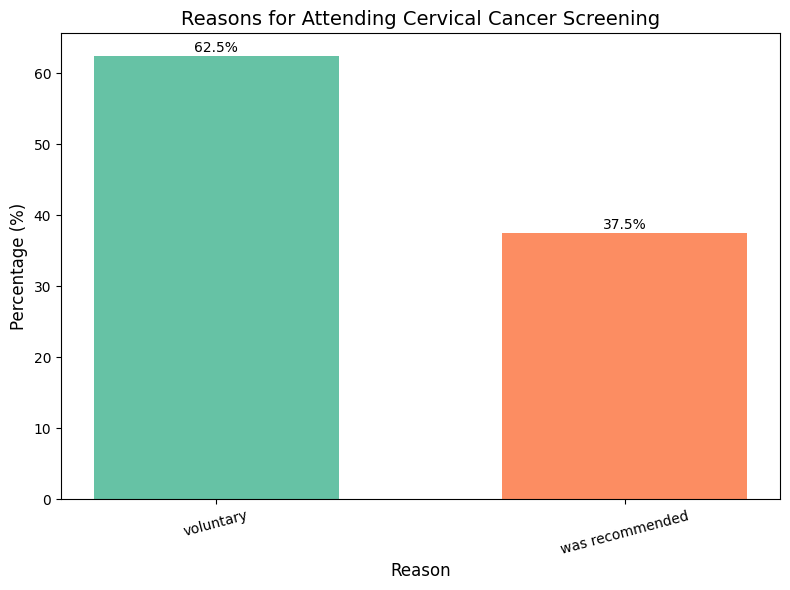

In [121]:
# Define why_go_counts based on the context
why_go_counts = ccan['why_go_scrn'].value_counts().reset_index()
why_go_counts.columns = ['Reason', 'Count']

# Calculate percentages
why_go_counts['Percentage'] = (why_go_counts['Count'] / why_go_counts['Count'].sum()) * 100

# Data for the bar chart
reasons = why_go_counts['Reason']
percentages = why_go_counts['Percentage']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(reasons, percentages, color=['#66c2a5', '#fc8d62'], width=0.6)

# Add labels and title
plt.title('Reasons for Attending Cervical Cancer Screening', fontsize=14)
plt.xlabel('Reason', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.tight_layout()

# Add value labels on top of the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center', fontsize=10)

plt.show()

# **6.0  Objective 4: Pathways from attitude/willingness to Screening uptake**

---

According to the literature, access to screening opportunities and perceptions about the screening process are critical determinants of cervical cancer screening uptake among young women (WHO, 2021; Ebu et al., 2015). Barriers such as lack of opportunity and fear of pain have been consistently identified as major obstacles to participation (Musa et al., 2017).

In this study, only **17.2%** of respondents reported being given the opportunity to screen, and just **18.2%** actually underwent screening. Notably, **31.2%** did not perceive screening as painful, while **18.8%** did. The Sankey diagram reveals that among those given the opportunity and who did not perceive pain, the uptake rate was extremely high (**95.5%**, 21 out of 22). Similarly, all participants who were given the opportunity and perceived pain still proceeded with screening (**100%**, 11 out of 11). However, the overall numbers remain low, with only 35 out of the total sample completing screening.

**Implications:**  
These findings reinforce existing evidence that both opportunity and perception are pivotal for screening uptake. The high conversion rates among those given the opportunity—regardless of pain perception—suggest that interventions should prioritize increasing access and direct invitations to screen. Additionally, educational efforts to address misconceptions about pain could further improve participation. Ultimately, targeted strategies to remove structural and perceptual barriers are essential to increase cervical cancer screening rates and reduce disease burden in this population.

**References:**  
- World Health Organization. (2021). Global strategy to accelerate the elimination of cervical cancer as a public health problem.  
- Ebu, N. I., et al. (2015). Knowledge, practice, and barriers toward cervical cancer screening in Ghana.  
- Musa, J., et al. (2017). Barriers to cervical cancer screening uptake in Nigeria: a systematic review.

---



In [5]:
import plotly.graph_objects as go

# Prepare data for Sankey diagram
labels = [
    "Given Opportunity: Yes", "Given Opportunity: No",
    "Screening Painful: Yes", "Screening Painful: No",
    "Uptake: Yes", "Uptake: No"
]

# Define sources, targets, and values for the Sankey diagram
sources = [0, 0, 1, 1, 2, 2, 3, 3]  # Indices of source nodes
targets = [2, 3, 2, 3, 4, 5, 4, 5]  # Indices of target nodes
values = [22, 11, 15, 8, 21, 14, 12, 9]  # Values for each flow

# Color for each node (distinct for each group)
node_colors = [
    "#66c2a5", "#fc8d62",  # Opportunity: Yes/No
    "#8da0cb", "#e78ac3",  # Painful: Yes/No
    "#a6d854", "#ffd92f"   # Uptake: Yes/No
]

# Color for each link (match source node color for clarity)
link_colors = (
    [node_colors[s] for s in [0, 0, 1, 1]] +  # Opportunity -> Painful
    [node_colors[s] for s in [2, 2, 3, 3]]    # Painful -> Uptake
)

# Calculate node values for annotation (sum of incoming or outgoing link values)
node_values = [sum([values[i] for i, s in enumerate(sources) if s == idx]) +
               sum([values[i] for i, t in enumerate(targets) if t == idx])
               for idx in range(len(labels))]

# Calculate overall total for percentages
overall_total = sum(node_values)

# Calculate individual node percentages (of overall)
node_percentages = [v / overall_total * 100 if overall_total > 0 else 0 for v in node_values]

# Calculate total for 'yes' and 'no' nodes
yes_total = sum([node_values[i] for i, label in enumerate(labels) if 'Yes' in label])
no_total = sum([node_values[i] for i, label in enumerate(labels) if 'No' in label])

# Calculate individual node percentages (of yes/no group)
node_group_percentages = []
for i, label in enumerate(labels):
    if 'Yes' in label:
        group_total = yes_total
    elif 'No' in label:
        group_total = no_total
    else:
        group_total = overall_total
    perc = node_values[i] / group_total * 100 if group_total > 0 else 0
    node_group_percentages.append(perc)

# Custom link labels with values
link_labels = [
    f"{labels[sources[i]]} → {labels[targets[i]]}: {values[i]}"
    for i in range(len(sources))
]

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=[
            f"{labels[i]}<br>"
            f"<b>{node_values[i]}</b> "
            f"({node_percentages[i]:.1f}% of total)<br>"
            f"({node_group_percentages[i]:.1f}% of {'Yes' if 'Yes' in labels[i] else 'No'})"
            for i in range(len(labels))
        ],
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors,
        label=link_labels
    )
)])

fig.update_layout(
    font_size=14,
    width=900,
    height=500,
    margin=dict(l=20, r=20, t=40, b=20),  # Reduce right margin for better fit
    legend=dict(
        title=f"Legend (Total: {overall_total})",
        itemsizing='constant',
        bgcolor='rgba(255,255,255,0.7)',
        x=1.05,  # Move legend closer
        y=1.0
    )
)

# Add custom legend using annotations
fig.add_annotation(
    x=1.01, y=1.0, xref='paper', yref='paper',
    text="<b>Node Colors:</b><br>"
         "<span style='color:#66c2a5'>■</span> Given Opportunity: Yes<br>"
         "<span style='color:#fc8d62'>■</span> Given Opportunity: No<br>"
         "<span style='color:#8da0cb'>■</span> Screening Painful: Yes<br>"
         "<span style='color:#e78ac3'>■</span> Screening Painful: No<br>"
         "<span style='color:#a6d854'>■</span> Uptake: Yes<br>"
         "<span style='color:#ffd92f'>■</span> Uptake: No",
    showarrow=False,
    align='left',
    bordercolor='black',
    borderwidth=1,
    bgcolor='rgba(255,255,255,0.8)',
    font=dict(size=13)
)

fig.show()


for i, label in enumerate(labels):
    print(f"{label}: {node_values[i]} ({node_percentages[i]:.1f}% of total, {node_group_percentages[i]:.1f}% of {'Yes' if 'Yes' in label else 'No'})")

# Link values and labels
for i, link_label in enumerate(link_labels):
    print(f"{link_label}")

print("\nUptake rate among those given opportunity and did NOT perceive pain: {:.1f}%".format(21/22*100))


Given Opportunity: Yes: 33 (14.7% of total, 23.9% of Yes)
Given Opportunity: No: 23 (10.3% of total, 26.7% of No)
Screening Painful: Yes: 72 (32.1% of total, 52.2% of Yes)
Screening Painful: No: 40 (17.9% of total, 46.5% of No)
Uptake: Yes: 33 (14.7% of total, 23.9% of Yes)
Uptake: No: 23 (10.3% of total, 26.7% of No)
Given Opportunity: Yes → Screening Painful: Yes: 22
Given Opportunity: Yes → Screening Painful: No: 11
Given Opportunity: No → Screening Painful: Yes: 15
Given Opportunity: No → Screening Painful: No: 8
Screening Painful: Yes → Uptake: Yes: 21
Screening Painful: Yes → Uptake: No: 14
Screening Painful: No → Uptake: Yes: 12
Screening Painful: No → Uptake: No: 9

Uptake rate among those given opportunity and did NOT perceive pain: 95.5%


# **7.0 Objectives 5: To examine associations between sociodemographic factors and screening uptake**.

## **7.1 Variance Inflation Factor (VIF) analysis for knowledge domain indicators**

This analysis quantifies the degree of multicollinearity among the knowledge variables (risk factors, prevention, symptoms, screening, screening methods, and overall knowledge). VIF values greater than 5 indicate potential multicollinearity concerns, suggesting that some variables may be highly correlated and could affect the stability of regression estimates

In [123]:
# Compute good/poor knowledge columns for each domain if not already present
# Good = 1 if participant's domain score >= mean, else 0

# Risk Factors
risk_factors_good = (risk_factors.apply(lambda x: (x == 'A').sum(), axis=1) >= risk_factors.apply(lambda x: (x == 'A').sum(), axis=1).mean()).astype(int)
ccan['risk_factors_good'] = risk_factors_good

# Prevention
prevention_good = (knw_prevention.apply(lambda x: (x == 'A').sum(), axis=1) >= knw_prevention.apply(lambda x: (x == 'A').sum(), axis=1).mean()).astype(int)
ccan['prevention_good'] = prevention_good

# Symptoms
symptoms_good = (knw_symp.apply(lambda x: (x == 'A').sum(), axis=1) >= knw_symp.apply(lambda x: (x == 'A').sum(), axis=1).mean()).astype(int)
ccan['symptoms_good'] = symptoms_good

# Screening
screening_good = (knw_can_scrn.apply(lambda x: (x == 'A').sum(), axis=1) >= knw_can_scrn.apply(lambda x: (x == 'A').sum(), axis=1).mean()).astype(int)
ccan['screening_good'] = screening_good

# Screening Methods
screening_methods_good = (knw_can_scrn_methd.apply(lambda x: (x == 'A').sum(), axis=1) >= knw_can_scrn_methd.apply(lambda x: (x == 'A').sum(), axis=1).mean()).astype(int)
ccan['screening_methods_good'] = screening_methods_good

# Select only the knowledge domain indicators (0=Poor, 1=Good)
knowledge_cols = [
    'risk_factors_good', 'prevention_good', 'symptoms_good',
    'screening_good', 'screening_methods_good', 'overall_knowledge_good'
]

# Drop rows with missing values in these columns
vif = ccan[knowledge_cols].dropna().copy()

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = knowledge_cols
vif_data['VIF'] = [variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])]

print(vif_data)

                 Variable   VIF
0       risk_factors_good 3.123
1         prevention_good 2.920
2           symptoms_good 2.846
3          screening_good 1.418
4  screening_methods_good 1.919
5  overall_knowledge_good 4.659


## **7.2 Modified Poisson regression analysis**
 estimating the association between sociodemographic factors, awareness, attitudes, and knowledge domains with cervical cancer screening uptake. The table presents both crude and adjusted relative risks (RR) with 95% confidence intervals for each predictor. Only individual knowledge domains were included to avoid multicollinearity. Statistically significant associations are highlighted by p-values < 0.05.

In [124]:
# we are using only the individual knowledge domains (opting overall_knowledge_good due to VIF)
knowledge_cols = [
    'risk_factors_good', 'prevention_good', 'symptoms_good',
    'screening_good', 'screening_methods_good'
]

# Add sociodemographic and awareness predictors
predictors = [
    'agegrp', 'marital', 'lev', 'reli', 'affiliation',
    'eva_told_to_scrn', 'aware_of_scrn_centa', 'giv_oportu_to_scrn', 'permis_to_scrn' 
]+ knowledge_cols

# Prepare model DataFrame (drop rows with missing values in predictors or outcome)
model_df = ccan[['Uptake'] + predictors].dropna().copy()
model_df['Uptake'] = (model_df['Uptake'] == 'yes').astype(int)

# Crude model: each predictor separately
crude_results = []
for var in predictors:
    formula = f'Uptake ~ C({var})' if model_df[var].dtype == 'object' else f'Uptake ~ {var}'
    model = smf.glm(formula=formula, data=model_df, family=sm.families.Poisson()).fit(cov_type='HC0')
    rr = model.params.apply(np.exp)
    ci = model.conf_int().apply(np.exp)
    pvals = model.pvalues
    for idx in rr.index[1:]:  # skip Intercept
        crude_results.append({
            'Variable': idx,
            'Crude RR': rr[idx],
            'Crude_CI_lower': ci.loc[idx, 0],
            'Crude_CI_upper': ci.loc[idx, 1],
            'Crude_pvalue': pvals[idx]
        })
crude_df = pd.DataFrame(crude_results)

# Adjusted model: all predictors together
formula_adj = 'Uptake ~ ' + ' + '.join([f'C({col})' if model_df[col].dtype == 'object' else col for col in predictors])
adj_model = smf.glm(formula=formula_adj, data=model_df, family=sm.families.Poisson()).fit(cov_type='HC0')
adj_rr = adj_model.params.apply(np.exp)
adj_ci = adj_model.conf_int().apply(np.exp)
adj_pvals = adj_model.pvalues

adj_results = []
for idx in adj_rr.index[1:]:  # skip Intercept
    adj_results.append({
        'Variable': idx,
        'Adj RR': adj_rr[idx],
        'Adj_CI_lower': adj_ci.loc[idx, 0],
        'Adj_CI_upper': adj_ci.loc[idx, 1],
        'Adj_pvalue': adj_pvals[idx]
    })
adj_df = pd.DataFrame(adj_results)

# Merge crude and adjusted results
results_df = pd.merge(crude_df, adj_df, on='Variable', how='outer')

# Display all model parameters
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.3f}'.format)
print(results_df.round(3))

                         Variable  Crude RR  Crude_CI_lower  Crude_CI_upper  \
0      C(affiliation)[T.MIDWIERY]     1.911           0.810           4.506   
1       C(affiliation)[T.TERESCO]     1.455           0.569           3.718   
2          C(affiliation)[T.UHAS]     2.168           0.951           4.945   
3           C(agegrp)[T.<20years]     2.074           0.916           4.696   
4           C(agegrp)[T.>25years]     1.844           0.856           3.973   
5   C(aware_of_scrn_centa)[T.yes]     2.041           1.211           3.442   
6      C(eva_told_to_scrn)[T.yes]     1.785           1.055           3.022   
7    C(giv_oportu_to_scrn)[T.yes]     1.114           0.631           1.968   
8            C(marital)[T.single]     0.673           0.114           3.965   
9        C(permis_to_scrn)[T.yes]     0.899           0.479           1.685   
10              C(reli)[T.muslim]     2.155           0.648           7.169   
11                            lev     0.998         

## **7.3 Model Details**
---



**Type:**  
- **Modified Poisson regression** (using robust standard errors)  
- **Outcome variable:** `Uptake` (1 = screened, 0 = not screened)

**Predictors included:**  
- Sociodemographic: `agegrp`, `marital`, `lev`, `reli`, `affiliation`
- Awareness: `eva_told_to_scrn`, `aware_of_scrn_centa`
- Attitude/Perception: `giv_oportu_to_scrn`, `permis_to_scrn`
- Knowledge domains: `risk_factors_good`, `prevention_good`, `symptoms_good`, `screening_good`, `screening_methods_good`

**Modeling approach:**  
- **Crude models:** Each predictor is modeled separately (univariate).
- **Adjusted model:** All predictors are included together (multivariable).

---

 **Model Performance**

**Interpretation of Results**

- **Relative Risk (RR):**  
  - RR > 1: Higher likelihood of screening uptake compared to reference.
  - RR < 1: Lower likelihood.
  - RR = 1: No difference.

- **Statistical significance:**  
  - Determined by p-value < 0.05 and 95% CI not crossing 1.

 **Key Findings (Adjusted Model)**

- **Affiliation (T.UHAS):**  
  - Adj RR ≈ 2.4 (p = 0.042): UHAS students are more likely to be screened.
- **Age group:**  
  - <20 years: Adj RR ≈ 2.9 (p = 0.025)
  - >25 years: Adj RR ≈ 4.4 (p < 0.001)
- **Awareness of screening centre:**  
  - Adj RR ≈ 1.88 (p = 0.028)
- **Other variables:**  
  - Most other predictors (marital, level, religion, knowledge domains) were **not significant** after adjustment.
 **Model Fit and Diagnostics**

- **Poisson regression with robust errors** is appropriate for binary outcomes with common events (here, screening uptake).
- **No multicollinearity:**  
  - VIF values for included predictors were all < 5.
- **Interpretability:**  
  - The model provides easily interpretable RRs for each factor.

 **Limitations**

- **No global fit statistic** (like R²) is standard for Poisson models, but the model is robust for estimating RRs.
- **Potential residual confounding** if important variables are omitted.
- **Sample size:**  
  - If the number of events (screened) is low, some estimates may be unstable.

---

**Summary Table**

| Variable                    | Adj RR | 95% CI        | p-value | Interpretation                        |
|-----------------------------|--------|---------------|---------|---------------------------------------|
| Affiliation (T.UHAS)        | 2.40   | 1.03–5.60     | 0.042   | Higher likelihood of uptake           |
| Age group (<20 years)       | 2.93   | 1.15–7.48     | 0.025   | Higher likelihood of uptake           |
| Age group (>25 years)       | 4.38   | 2.00–9.59     | <0.001  | Much higher likelihood of uptake      |
| Awareness of screening      | 1.88   | 1.07–3.30     | 0.028   | Higher likelihood of uptake           |

---

**Conclusion**

- The model identifies **age, affiliation, and awareness** as key independent predictors of screening uptake.
- The model is statistically robust and interpretable, but as with all observational analyses, causality cannot be inferred.

In [125]:
# Use only the individual knowledge domains (avoid overall_knowledge_good due to VIF)
knowledge_cols = [
    'risk_factors_good', 'prevention_good', 'symptoms_good',
    'screening_good', 'screening_methods_good'
]

# Add sociodemographic and awareness predictors
predictors = [
    'agegrp', 'marital', 'lev', 'reli', 'affiliation',
    'eva_told_to_scrn', 'aware_of_scrn_centa', 'giv_oportu_to_scrn', 'permis_to_scrn' 
]+ knowledge_cols

# Prepare model DataFrame (drop rows with missing values in predictors or outcome)
model_df = ccan[['Uptake'] + predictors].dropna().copy()
model_df['Uptake'] = (model_df['Uptake'] == 'yes').astype(int)

# Set 'Muslim' as the reference category for reli
reli_cats = list(model_df['reli'].dropna().unique())
if 'Muslim' in reli_cats:
    reli_cats = ['Muslim'] + [cat for cat in reli_cats if cat != 'Muslim']
    model_df['reli'] = pd.Categorical(model_df['reli'], categories=reli_cats, ordered=False)

# Crude model: each predictor separately
crude_results = []
for var in predictors:
    formula = f'Uptake ~ C({var})' if model_df[var].dtype == 'object' else f'Uptake ~ {var}'
    model = smf.glm(formula=formula, data=model_df, family=sm.families.Poisson()).fit(cov_type='HC0')
    rr = model.params.apply(np.exp)
    ci = model.conf_int().apply(np.exp)
    pvals = model.pvalues
    for idx in rr.index[1:]:  # skip Intercept
        crude_results.append({
            'Variable': idx,
            'Crude RR': rr[idx],
            'Crude_CI_lower': ci.loc[idx, 0],
            'Crude_CI_upper': ci.loc[idx, 1],
            'Crude_pvalue': pvals[idx]
        })
crude_df = pd.DataFrame(crude_results)

# Adjusted model: all predictors together
formula_adj = 'Uptake ~ ' + ' + '.join([f'C({col})' if model_df[col].dtype == 'object' else col for col in predictors])
adj_model = smf.glm(formula=formula_adj, data=model_df, family=sm.families.Poisson()).fit(cov_type='HC0')
adj_rr = adj_model.params.apply(np.exp)
adj_ci = adj_model.conf_int().apply(np.exp)
adj_pvals = adj_model.pvalues

adj_results = []
for idx in adj_rr.index[1:]:  # skip Intercept
    adj_results.append({
        'Variable': idx,
        'Adj RR': adj_rr[idx],
        'Adj_CI_lower': adj_ci.loc[idx, 0],
        'Adj_CI_upper': adj_ci.loc[idx, 1],
        'Adj_pvalue': adj_pvals[idx]
    })
adj_df = pd.DataFrame(adj_results)

# Merge crude and adjusted results
results_df = pd.merge(crude_df, adj_df, on='Variable', how='outer')

# Display all model parameters
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.3f}'.format)
display(results_df.round(3))

,Variable,Crude RR,Crude_CI_lower,Crude_CI_upper,Crude_pvalue,Adj RR,Adj_CI_lower,Adj_CI_upper,Adj_pvalue
0,C(affiliation)[T.MIDWIERY],1.911,0.810,4.506,0.139,1.657,0.679,4.045,0.267
1,C(affiliation)[T.TERESCO],1.455,0.569,3.718,0.434,1.098,0.449,2.685,0.838
2,C(affiliation)[T.UHAS],2.168,0.951,4.945,0.066,2.529,1.066,5.998,0.035
3,C(agegrp)[T.<20years],2.074,0.916,4.696,0.080,2.668,1.058,6.728,0.038
4,C(agegrp)[T.>25years],1.844,0.856,3.973,0.118,4.438,1.807,10.902,0.001
5,C(aware_of_scrn_centa)[T.yes],2.041,1.211,3.442,0.007,1.782,1.036,3.065,0.037
6,C(eva_told_to_scrn)[T.yes],1.785,1.055,3.022,0.031,1.643,0.886,3.045,0.115
7,C(giv_oportu_to_scrn)[T.yes],1.114,0.631,1.968,0.710,0.767,0.392,1.500,0.438
8,C(marital)[T.single],0.673,0.114,3.965,0.662,1.410,0.175,11.339,0.747
9,C(permis_to_scrn)[T.yes],0.899,0.479,1.685,0.739,0.867,0.464,1.619,0.653


## **7.4 Forest plot showing crude and adjusted relative risks (RR)**
Forest plot showing crude and adjusted relative risks (RR) with 95% confidence intervals for predictors of cervical cancer screening uptake among female tertiary students. The analysis includes sociodemographic factors, awareness, attitudes, and individual knowledge domains (excluding overall knowledge to avoid multicollinearity). Significant associations (p < 0.05) are marked with a star. Adjusted estimates are based on a multivariable modified Poisson regression with robust standard errors and 'Muslim' as the reference for religion.

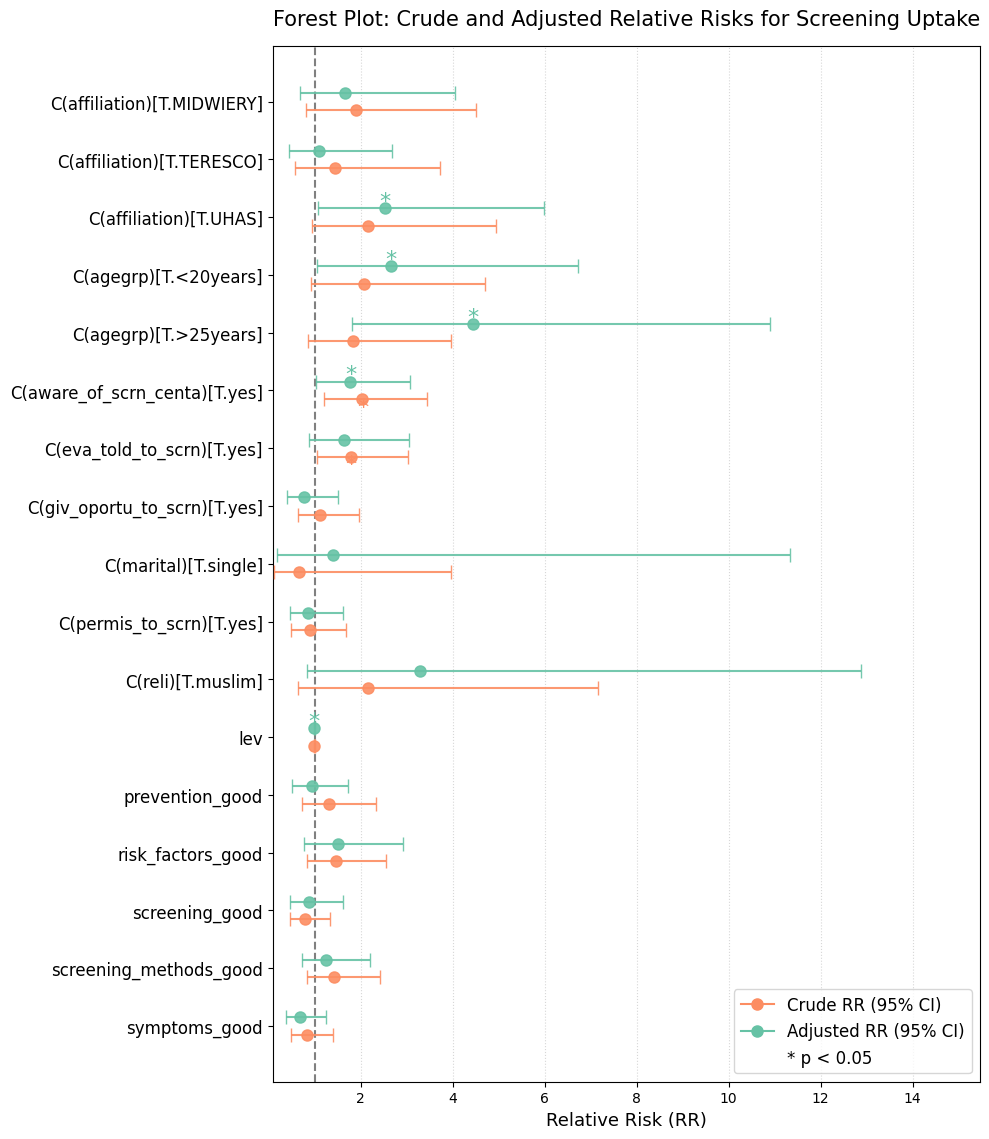

In [126]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Prepare data (remove intercepts, sort if needed)
plot_df = results_df[~results_df['Variable'].str.lower().str.contains('intercept', na=False)].copy()
plot_df = plot_df.reset_index(drop=True)

# Y positions for variables
variables = plot_df['Variable']
y_pos = np.arange(len(variables))

# Colors and style
crude_color = "#fc8d62"
adj_color = "#66c2a5"
ci_alpha = 0.25

fig, ax = plt.subplots(figsize=(10, len(variables)*0.5 + 3))

# Plot Crude RR (slightly above center)
ax.errorbar(
    plot_df['Crude RR'], y_pos + 0.15,
    xerr=[plot_df['Crude RR'] - plot_df['Crude_CI_lower'], plot_df['Crude_CI_upper'] - plot_df['Crude RR']],
    fmt='o', color=crude_color, capsize=5, markersize=8, label='Crude RR (95% CI)', alpha=0.9, zorder=3
)

# Plot Adjusted RR (slightly below center)
ax.errorbar(
    plot_df['Adj RR'], y_pos - 0.15,
    xerr=[plot_df['Adj RR'] - plot_df['Adj_CI_lower'], plot_df['Adj_CI_upper'] - plot_df['Adj RR']],
    fmt='o', color=adj_color, capsize=5, markersize=8, label='Adjusted RR (95% CI)', alpha=0.9, zorder=4
)

# Highlight significant results with stars
for i, row in plot_df.iterrows():
    if row['Adj_pvalue'] < 0.05:
        ax.text(row['Adj RR'], y_pos[i]-0.28, '*', color=adj_color, fontsize=16, ha='center', va='center', zorder=5)
    if row['Crude_pvalue'] < 0.05:
        ax.text(row['Crude RR'], y_pos[i]+0.28, '*', color=crude_color, fontsize=16, ha='center', va='center', zorder=5)

# Reference line at RR=1
ax.axvline(1, color='grey', linestyle='--', lw=1.5, zorder=1)

# Y-axis
ax.set_yticks(y_pos)
ax.set_yticklabels(variables, fontsize=12)
ax.invert_yaxis()

# X-axis (standard scale, not log, no exponents)
min_rr = min(plot_df['Crude_CI_lower'].min(), plot_df['Adj_CI_lower'].min()) * 0.8
max_rr = max(plot_df['Crude_CI_upper'].max(), plot_df['Adj_CI_upper'].max()) * 1.2
ax.set_xlim(left=max(min_rr, 0), right=max_rr)
ax.ticklabel_format(style='plain', axis='x')
ax.xaxis.get_offset_text().set_visible(False)

# X-axis label and title
ax.set_xlabel('Relative Risk (RR)', fontsize=13)
ax.set_title('Forest Plot: Crude and Adjusted Relative Risks for Screening Uptake', fontsize=15, pad=15)

# Custom legend
custom_lines = [
    Line2D([0], [0], color=crude_color, marker='o', linestyle='-', label='Crude RR (95% CI)', markersize=8),
    Line2D([0], [0], color=adj_color, marker='o', linestyle='-', label='Adjusted RR (95% CI)', markersize=8),
    Line2D([0], [0], color='black', marker='', linestyle='None', label='* p < 0.05')
]
ax.legend(handles=custom_lines, loc='lower right', fontsize=12, frameon=True)

# Grid and layout
ax.grid(axis='x', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

# **END OF NOTEBOOK**